<a href="https://colab.research.google.com/github/vduran18/Neural-Nets/blob/master/Duran_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
#import packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal, Orthogonal
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from time import time
import seaborn as sns
from scipy.stats import norm
from pandas import DataFrame as df
from sklearn.metrics import plot_confusion_matrix
import itertools

In [ ]:
stock = pd.read_csv("https://raw.githubusercontent.com/vduran18/Datasets/master/LGND.csv")

In [ ]:
stock = stock[["Date","Close"]]
stock.rename({"Close" :"S"}, axis=1, inplace=True)

In [ ]:
stock.head()

Date          S
0  2014-01-02  51.520000
1  2014-01-03  52.020000
2  2014-01-06  51.540001
3  2014-01-07  53.270000
4  2014-01-08  55.450001

In [ ]:
stock.shape

(1007, 2)

In [ ]:
#Get moving time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_vars = 1 if type(data) is list else data.shape[1]
    variables = list(data.columns)
    df = data.copy(deep = True)
    cols, names = list(), list()
    #input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += ['{}(t-{})'.format(j, i) for j in variables]
    #forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += ['{}(t)'.format(j) for j in variables]
        else:
            names += ['{}(t+{})'.format(j, i) for j in variables]
  # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
#stock = stock[["Date","Close"]]
stock.imp = series_to_supervised(stock.loc[:,'S':], n_in=14, n_out=2, dropnan=False)
stock.imp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


S(t-14)     S(t-13)     S(t-12)  ...      S(t-1)        S(t)      S(t+1)
0            NaN         NaN         NaN  ...         NaN   51.520000   52.020000
1            NaN         NaN         NaN  ...   51.520000   52.020000   51.540001
2            NaN         NaN         NaN  ...   52.020000   51.540001   53.270000
3            NaN         NaN         NaN  ...   51.540001   53.270000   55.450001
4            NaN         NaN         NaN  ...   53.270000   55.450001   57.930000
...          ...         ...         ...  ...         ...         ...         ...
1002  129.300003  128.360001  129.550003  ...  135.479996  135.449997  136.399994
1003  128.360001  129.550003  131.630005  ...  135.449997  136.399994  138.399994
1004  129.550003  131.630005  134.690002  ...  136.399994  138.399994  138.660004
1005  131.630005  134.690002  135.059998  ...  138.399994  138.660004  136.929993
1006  134.690002  135.059998  135.800003  ...  138.660004  136.929993         NaN

[1007 rows x 16 columns]

In [ ]:
for i in [5, 10, 20]:
    stock.imp['MA'+str(i)] = stock['S'].rolling(i).mean()

In [ ]:
stock.imp.dropna(inplace=True)
V = stock.imp.copy()
V = V[V.columns[[16,17,18,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]]
V

MA5        MA10        MA20  ...      S(t-1)        S(t)      S(t+1)
19     61.011999   63.024999   59.773000  ...   61.680000   62.919998   61.939999
20     61.347999   62.798000   60.294000  ...   62.919998   61.939999   58.970001
21     61.389999   62.268999   60.641500  ...   61.939999   58.970001   59.330002
22     60.968000   61.655000   61.031000  ...   58.970001   59.330002   57.150002
23     60.062000   60.823000   61.225000  ...   59.330002   57.150002   56.820000
...          ...         ...         ...  ...         ...         ...         ...
1001  136.579999  136.187000  133.428001  ...  136.270004  135.479996  135.449997
1002  136.495999  136.262999  133.515001  ...  135.479996  135.449997  136.399994
1003  136.351999  136.396999  133.823000  ...  135.449997  136.399994  138.399994
1004  136.399997  136.656998  134.212000  ...  136.399994  138.399994  138.660004
1005  136.877997  136.784998  134.602000  ...  138.399994  138.660004  136.929993

[987 rows x 19 columns]

In [ ]:
V.head().to_excel("V_head.xlsx")
files.download("V_head.xlsx")

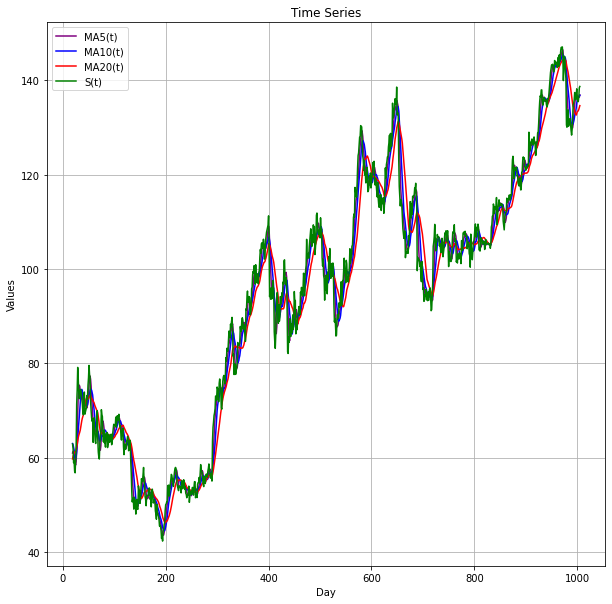

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(V['MA5'], color = 'purple', label = 'MA5(t)')
ax.plot(V['MA10'], color = 'blue', label = 'MA10(t)')
ax.plot(V['MA20'], color = "red", label = 'MA20(t)')
ax.plot(V['S(t)'], color = 'green', label = 'S(t)') 
ax.set(title='Time Series', ylabel='Values', xlabel='Day')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig("Time Series.png")
files.download('Time Series.png')

### Get Training Sets

In [ ]:
train = V.sample(frac=0.9, random_state = 0)
train_idx = list(train.index)
train.shape


(888, 19)

In [ ]:
test = V.drop(index = train_idx)
test.shape

(99, 19)

In [ ]:
Xtrain, Ytrain = train.iloc[:,:18], train.iloc[:,18]
Xtest, Ytest = test.iloc[:,:18], test.iloc[:,18]

print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

(888, 18) (888,)
(99, 18) (99,)


In [ ]:
Xtrain

MA5        MA10        MA20  ...      S(t-2)      S(t-1)        S(t)
731  106.690000  106.531999  101.487000  ...  106.790001  106.830002  106.769997
291   57.374000   57.486000   56.443000  ...   55.820000   55.070000   63.580002
46    70.745999   70.992999   72.697500  ...   69.779999   70.199997   70.570000
795  103.675998  104.227998  105.589999  ...  107.379997  104.629997  103.150002
772  102.950000  103.153001  104.148500  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
162   52.461999   54.231000   52.914500  ...   51.750000   51.240002   49.849998
865  113.517998  111.692998  112.688999  ...  115.000000  114.089996  114.379997
199   46.038000   44.921000   46.260000  ...   45.830002   46.279999   48.860001
887  118.612000  119.971000  119.250500  ...  118.199997  117.779999  117.580002
150   51.882000   50.898000   52.371500  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

### PCA Analysis

In [ ]:
corr = V.iloc[:,:18].corr()
corr.describe()

MA5       MA10       MA20  ...     S(t-2)     S(t-1)       S(t)
count  18.000000  18.000000  18.000000  ...  18.000000  18.000000  18.000000
mean    0.986145   0.991056   0.990959  ...   0.983894   0.981651   0.978947
std     0.012078   0.007477   0.004668  ...   0.012629   0.013659   0.014185
min     0.963368   0.974126   0.980393  ...   0.960452   0.957391   0.954758
25%     0.977195   0.987988   0.988336  ...   0.974537   0.971165   0.968018
50%     0.988603   0.993896   0.992202  ...   0.985910   0.983229   0.980356
75%     0.996877   0.996353   0.993846  ...   0.994607   0.993162   0.990337
max     1.000000   1.000000   1.000000  ...   1.000000   1.000000   1.000000

[8 rows x 18 columns]

In [ ]:
corr

MA5      MA10      MA20  ...    S(t-2)    S(t-1)      S(t)
MA5      1.000000  0.997212  0.987961  ...  0.998591  0.997896  0.995872
MA10     0.997212  1.000000  0.994599  ...  0.995117  0.993194  0.990586
MA20     0.987961  0.994599  1.000000  ...  0.985510  0.983098  0.980393
S(t-14)  0.963368  0.974126  0.990869  ...  0.960452  0.957391  0.954758
S(t-13)  0.966493  0.977319  0.992166  ...  0.963774  0.960490  0.957432
S(t-12)  0.969775  0.980567  0.993159  ...  0.967169  0.963809  0.960528
S(t-11)  0.973084  0.983859  0.993829  ...  0.970264  0.967203  0.963847
S(t-10)  0.976386  0.987159  0.994156  ...  0.973725  0.970301  0.967244
S(t-9)   0.979623  0.990474  0.994163  ...  0.976971  0.973758  0.970338
S(t-8)   0.982841  0.993118  0.993852  ...  0.980246  0.977004  0.973794
S(t-7)   0.986015  0.995067  0.993199  ...  0.983322  0.980279  0.977040
S(t-6)   0.989245  0.996337  0.992239  ...  0.986310  0.983359  0.980319
S(t-5)   0.992505  0.996952  0.990987  ...  0.989561  0.986339  0.983390
S(t-4)   0.995859  0.996959  0.989460  ...  0.993064  0.989583  0.986364
S(t-3)   0.997889  0.996358  0.987628  ...  0.996469  0.993067  0.989589
S(t-2)   0.998591  0.995117  0.985510  ...  1.000000  0.996475  0.993076
S(t-1)   0.997896  0.993194  0.983098  ...  0.996475  1.000000  0.996479
S(t)     0.995872  0.990586  0.980393  ...  0.993076  0.996479  1.000000

[18 rows x 18 columns]

In [ ]:
corr.to_excel('corr.xlsx')
files.download('corr.xlsx')

In [ ]:
#Use this
eigs = np.sort(np.linalg.eig(corr)[0])[::-1]
R = np.cumsum(eigs) / np.sum(eigs)
for i in range(18):
    if R[i]>=0.998:
        min_r = i
        break
print(min_r, R[min_r])
h = 4

4 0.9981234709680487


In [ ]:
pd.DataFrame(R).to_excel('R.xlsx')
files.download('R.xlsx')

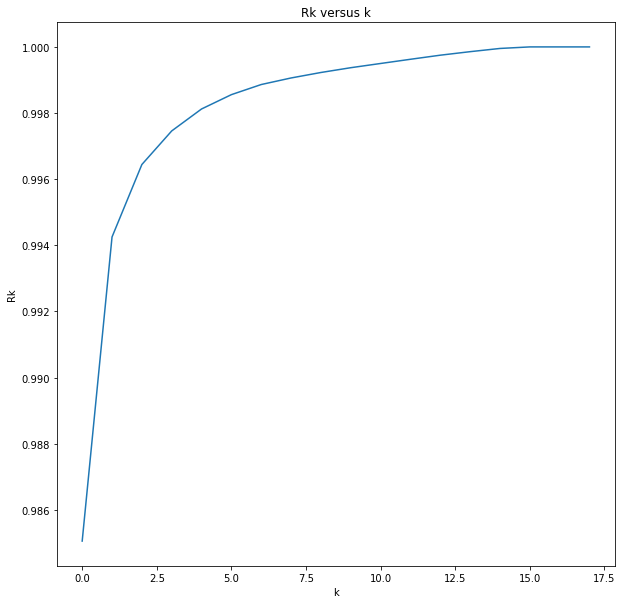

In [ ]:
#Plot the curve Rk vs 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(R) 
ax.set(title='Rk versus k', ylabel='Rk', xlabel='k')
plt.show()
fig.savefig("Rk versus k.png")
files.download('Rk versus k.png')

In [ ]:
#Compute number of weights and thresholds
#comp = I x h + h x 1 + b_hidd + b_out
comp = 18*4+4*1+4+1
comp
##There are 501 weights and thresholds### number of information 

81

In [ ]:
Ratio = Xtrain.size / 81
Ratio

197.33333333333334

# MLP HL =4

### MLP Try #3 HL=4 

In [ ]:
##try this if above results are bad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

# constructing the autoencoder

# determine h through PCA on your own data
# try to find suitable initializers for your own data
h = 4
mlp_try2 = Sequential()
mlp_try2.add(Dense(h, activation='relu', input_dim=18, bias_initializer=Constant(value=5)))
mlp_try2.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp_try2.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 4)                 76        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_try2.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='mean_squared_error')

In [ ]:
class mlp2MyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
      
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(logs['loss'])
      self.MSEtest.append(logs['loss'])

mlp2MyMonitor = mlp2MyHistory()

# For saving the best model during the whole training process.
checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)

In [ ]:
mlp2Monitor = mlp_try2.fit(Xtrain, Y_train, epochs=1000, batch_size=50, callbacks = [mlp2MyMonitor,es], validation_data = (Xtest, Y_test), verbose = 1)

Epoch 1/1000
18/18 [==============================] - 0s 8ms/step - loss: 6317.0693 - val_loss: 3769.9275
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 2377.8770 - val_loss: 1095.4347
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 621.9506 - val_loss: 265.8917
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 196.4864 - val_loss: 138.5013
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 150.4987 - val_loss: 137.8700
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 151.0951 - val_loss: 137.2943
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 150.2938 - val_loss: 136.4570
Epoch 8/1000
18/18 [==============================] - 0s 5ms/step - loss: 149.9699 - val_loss: 136.3864
Epoch 9/1000
18/18 [==============================] - 0s 5ms/step - loss: 149.9641 - val_loss: 136.3475
Epoch 10/1000
18/18 [==============================] - 0s 5m

In [ ]:
round(mlp_try2.evaluate(Xtest,Y_test),2)


4/4 [==============================] - 0s 2ms/step - loss: 10.2337


10.23

### RMSETrain and RMSETest for HL=4

In [ ]:
#Get MSETrain and MSETest
MSETrain2 = mlp2MyMonitor.MSEtrain
MSETest2 = mlp2MyMonitor.MSEtest
#Get RMSETrain and RMSETest
RMSETrain2 = np.sqrt(MSETrain2)
RMSETest2 = np.sqrt(MSETest2)

In [ ]:
y_train_pred2 = mlp_try2.predict(Xtrain)
y_test_pred2 = mlp_try2.predict(Xtest)

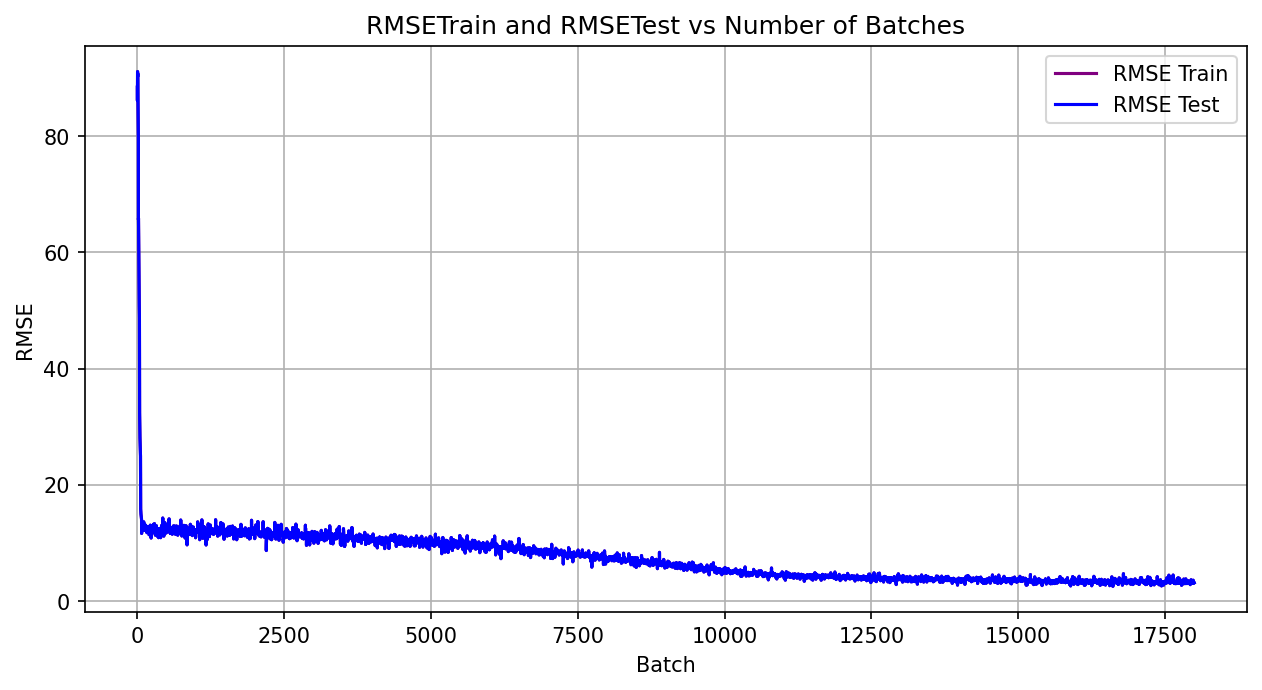

In [ ]:
fig = plt.figure(figsize=[10,5],dpi=150)
ax = fig.add_subplot(111)
ax.plot(RMSETrain2, color = 'purple', label = 'RMSE Train')
ax.plot(RMSETest2, color = 'blue', label = 'RMSE Test') 
ax.set(title='RMSETrain and RMSETest vs Number of Batches', ylabel='RMSE', xlabel='Batch')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig("RSME2.png")
files.download('RSME2.png')

In [ ]:
print("RMSETrain max and min: ", round(max(RMSETrain2),2), round(min(RMSETrain2),2))
print("MSETest max and min: ", round(max(RMSETest2),2), round(min(RMSETest2),2))

RMSETrain max and min:  91.13 2.52
MSETest max and min:  91.13 2.52


### Plot TARGt and Zt

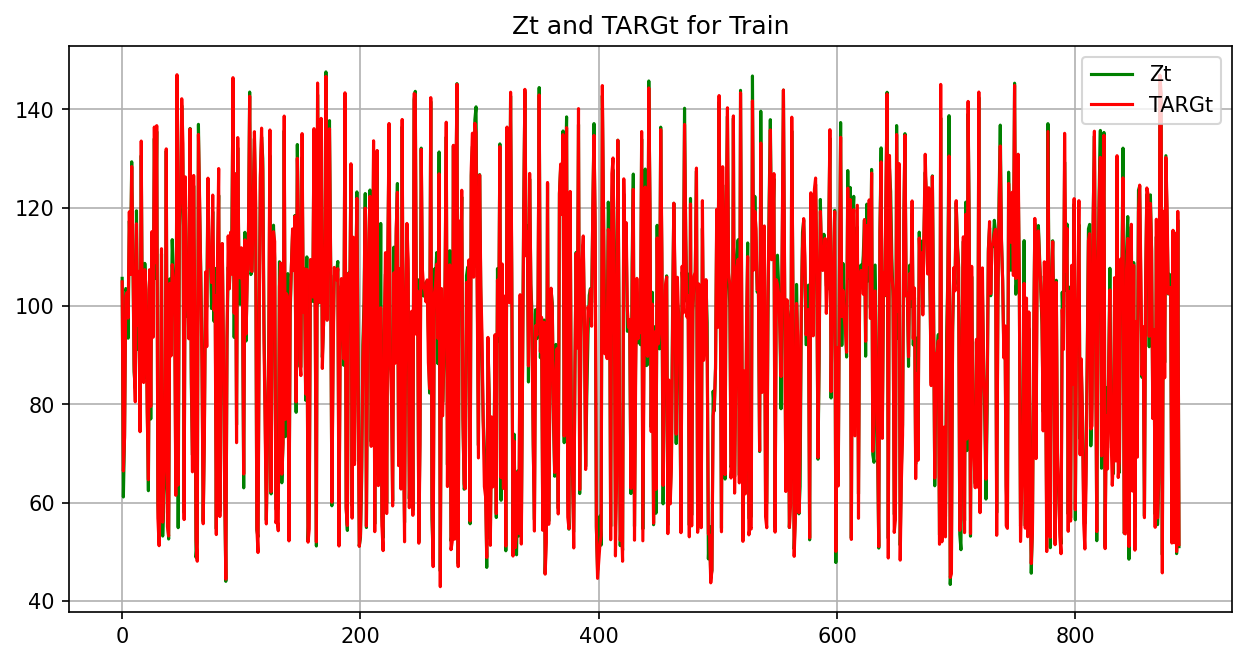

In [ ]:
fig = plt.figure(figsize=[10,5],dpi=150)
ax = fig.add_subplot(111)
ax.plot(y_train_pred2, color = 'green', label = 'Zt')
ax.plot(Y_train, color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Train')
plt.legend()
plt.grid(True)
#plt.show()
from google.colab import files
fig.savefig('COMPARE_TRAIN2.png')
files.download('COMPARE_TRAIN2.png')

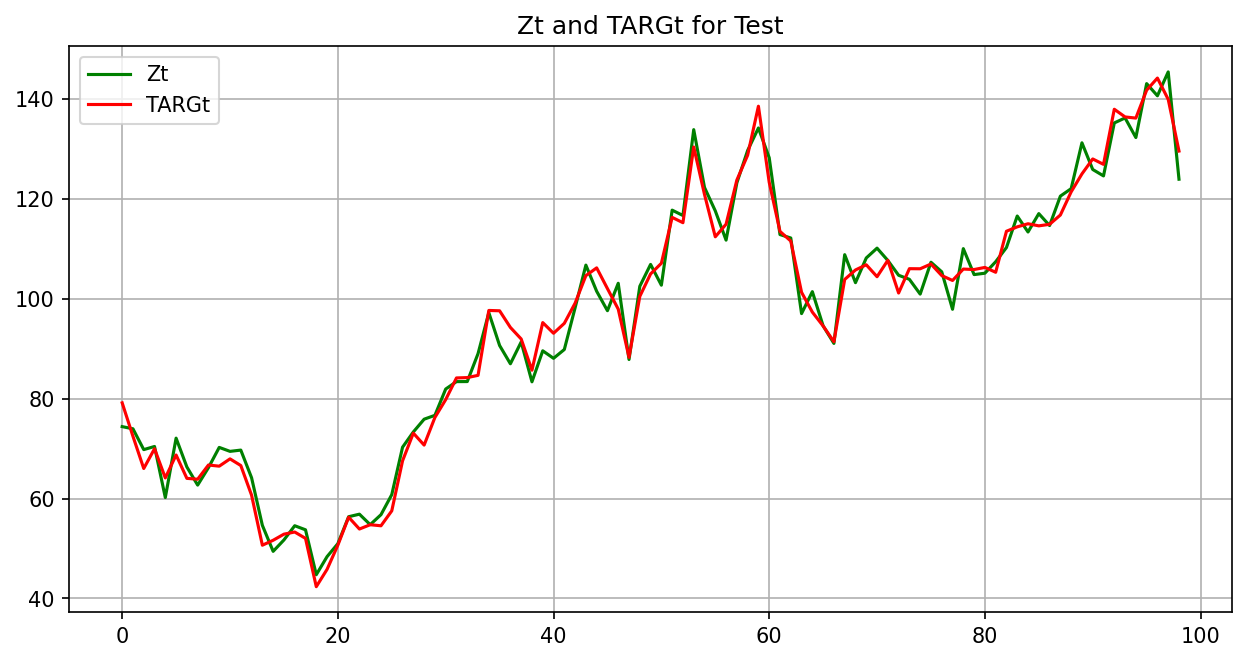

In [ ]:
fig = plt.figure(figsize=[10,5],dpi=150)
ax = fig.add_subplot(111)
ax.plot(y_test_pred2, color = 'green', label = 'Zt')
ax.plot(Y_test, color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Test')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('COMPARE_TEST2.png')
files.download('COMPARE_TEST2.png')

### MREP

In [ ]:
#Compute MREP(NewTest) = avg(|Zt - TARGt| / TARGt)
MREP_Train2 = np.average(abs(y_train_pred2 - Y_train) / Y_train)
MREP_Test2 = np.average(abs(y_test_pred2 - Y_test) / Y_test)

In [ ]:
print("MREP Train: ", round(MREP_Train2, 4))
print("MREP Test: ", round(MREP_Test2,4))

MREP Train:  0.028
MREP Test:  0.0291


### Get weights 

In [ ]:
#################################Try getting weights/outputs of each layer######################
weights = [layer.get_weights() for layer in mlp_try.layers]

In [ ]:
weights

[[array([[ 0.53880227,  0.40818906, -0.31703356, -0.08901407],
         [ 0.56733483,  0.20090483, -0.5548935 , -0.07149179],
         [-0.45412567,  0.08335107,  0.38579616, -0.4485658 ],
         [-0.24664591,  0.19040008, -0.13395515, -0.02507238],
         [ 0.05407361, -0.13921414, -0.14255117,  0.40657714],
         [ 0.32743397, -0.14559205, -0.01523916, -0.17248176],
         [ 0.20662454,  0.22969542,  0.35401967, -0.10380604],
         [ 0.46784118, -0.15871535, -0.19098568,  0.16708219],
         [-0.1566034 , -0.0204982 ,  0.20166841, -0.2005825 ],
         [ 0.38965628, -0.18747385,  0.08118544,  0.23139004],
         [ 0.0625433 ,  0.41262922, -0.37246996,  0.2039541 ],
         [-0.0557501 ,  0.5234998 ,  0.11304441,  0.28065172],
         [-0.11024757,  0.23298593,  0.5354989 , -0.30388218],
         [ 0.182387  , -0.34151265,  0.28587627,  0.05122305],
         [ 0.2593137 , -0.16016647,  0.00660954, -0.04671698],
         [-0.38427785,  0.19569   , -0.34519735,  0.426

In [ ]:
from keras import backend as K

# Get layer output 
get_1st_layer_output = K.function([mlp_try.layers[0].input],
                                  [mlp_try.layers[1].output])
last_layer_output = get_1st_layer_output(Xtrain)[0]

In [ ]:
pd.DataFrame(last_layer_output)

0
0    106.570389
1     63.450912
2     71.343109
3    103.024765
4    103.594391
..          ...
883   50.551628
884  114.603943
885   49.173134
886  118.261215
887   50.683098

[888 rows x 1 columns]

In [ ]:
# Get input layer output 
get_input_layer_output = K.function([mlp_try.layers[1].input],
                                  [mlp_try.layers[0].output])
input_layer_output = get_input_layer_output(Xtrain)[0]

In [ ]:
pd.DataFrame(input_layer_output)

0           1           2   ...          15          16          17
0    106.690002  106.531998  101.487000  ...  106.790001  106.830002  106.769997
1     57.374001   57.486000   56.443001  ...   55.820000   55.070000   63.580002
2     70.746002   70.992996   72.697502  ...   69.779999   70.199997   70.570000
3    103.675995  104.227997  105.589996  ...  107.379997  104.629997  103.150002
4    102.949997  103.153000  104.148499  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
883   52.461998   54.230999   52.914501  ...   51.750000   51.240002   49.849998
884  113.517998  111.693001  112.689003  ...  115.000000  114.089996  114.379997
885   46.037998   44.921001   46.260002  ...   45.830002   46.279999   48.860001
886  118.612000  119.971001  119.250504  ...  118.199997  117.779999  117.580002
887   51.882000   50.897999   52.371502  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

In [ ]:
# One way of getting hidden layer output
get_0st_layer_output = K.function([mlp_try.layers[0].input],
                                  [mlp_try.layers[0].output])
hidden_layer_output = get_0st_layer_output(Xtrain)[0]

In [ ]:
pd.DataFrame(hidden_layer_output)

0    1    2    3   ...   21         22          23         24
0    3.697920  0.0  0.0  0.0  ...  0.0  11.744160  130.696716  69.949142
1    5.398486  0.0  0.0  0.0  ...  0.0   7.728827   71.220863  37.344646
2    5.548269  0.0  0.0  0.0  ...  0.0   7.429607   85.055397  43.700161
3    3.188055  0.0  0.0  0.0  ...  0.0  10.605594  124.298508  62.457153
4    2.820742  0.0  0.0  0.0  ...  0.0   6.991659  122.532295  62.724243
..        ...  ...  ...  ...  ...  ...        ...         ...        ...
883  5.836712  0.0  0.0  0.0  ...  0.0   9.659431   66.128105  32.199757
884  3.630797  0.0  0.0  0.0  ...  0.0   9.419897  132.748047  68.616852
885  7.354885  0.0  0.0  0.0  ...  0.0   7.560536   54.022362  29.126274
886  0.691261  0.0  0.0  0.0  ...  0.0   8.332494  143.099304  69.160004
887  7.115509  0.0  0.0  0.0  ...  0.0   9.536983   63.183685  30.527039

[888 rows x 25 columns]

In [ ]:
first_layer_weights2 = mlp_try2.layers[0].get_weights()[0]
first_layer_weights2

array([[ 0.05856067, -0.0393432 ,  0.541651  , -0.21936578],
       [ 0.14267182, -0.01415151, -0.3102124 , -0.12420261],
       [-0.197103  ,  0.24929653,  0.25381073, -0.12938786],
       [-0.01443768,  0.31212053,  0.59192115, -0.24365842],
       [-0.34484488, -0.4269212 ,  0.06483608, -0.20577899],
       [ 0.2650382 ,  0.11940798, -0.23971565, -0.40969878],
       [ 0.31625986,  0.25331768,  0.10706486, -0.37588796],
       [-0.22050628, -0.31508926, -0.202953  ,  0.17618084],
       [ 0.20797509, -0.11180859, -0.13939601, -0.3244723 ],
       [-0.3611892 ,  0.05867738, -0.07560441,  0.32722235],
       [ 0.3413602 ,  0.00753589, -0.1473209 ,  0.24775118],
       [-0.16682613,  0.21914288,  0.4338751 ,  0.16075814],
       [-0.35203657, -0.1489948 ,  0.1081759 ,  0.25946748],
       [ 0.43324155, -0.07182146,  0.29084313, -0.05513242],
       [-0.21873102,  0.14939983, -0.09842501, -0.21223933],
       [-0.39271525,  0.14756615, -0.27394792, -0.36828178],
       [-0.02189159, -0.

In [ ]:
first_layer_bias = mlp_try.layers[0].get_weights()[1]
first_layer_bias

array([9.21878  , 4.9808116, 5.       , 5.       , 4.4025106, 5.       ,
       1.892728 , 5.       , 5.       , 8.4485445, 7.5857363, 6.303905 ,
       5.95781  , 1.7714686, 8.51926  , 1.8704863, 5.       , 8.422977 ,
       8.84097  , 8.389157 , 5.       , 4.9886146, 8.681285 , 1.954777 ,
       2.0366023], dtype=float32)

In [ ]:
#Display weights linking hidden layer to output node
second_layer_weights2 = mlp_try2.layers[1].get_weights()[0]
second_layer_weights2

array([[ 0.25970566],
       [-1.9262207 ],
       [ 0.50080657],
       [ 0.5103843 ]], dtype=float32)

In [ ]:
second_layer_bias = mlp_try.layers[1].get_weights()[1]
second_layer_bias

array([36.748287], dtype=float32)

### Hidden layer output and weights

In [ ]:
Houtput2 = pd.DataFrame(mlp_try2.layers[0](Xtrain.values).numpy())
Houtput2


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



0          1           2    3
0    0.0   6.909064  174.021393  0.0
1    0.0  10.500589   99.049950  0.0
2    0.0  10.007766  122.476288  0.0
3    0.0   9.569827  180.121109  0.0
4    0.0   9.867314  179.878021  0.0
..   ...        ...         ...  ...
883  0.0  11.500496   89.650574  0.0
884  0.0   8.090421  196.879517  0.0
885  0.0  11.534781   80.012451  0.0
886  0.0   8.884013  205.335602  0.0
887  0.0  12.681078   87.271286  0.0

[888 rows x 4 columns]

In [ ]:
# Average activities of neurons in hidden layer
#label_train=np.argmax(Y_train, axis=1)

PROF2=np.mean(Houtput2, axis=0)

In [ ]:
pd.DataFrame(PROF2)

0
0     3.368911
1     0.000000
2     0.000000
3     0.000000
4     8.223129
5     0.000000
6   103.538765
7     0.000000
8     0.000000
9    59.023830
10    3.638385
11   10.438637
12    0.000000
13  294.022034
14   67.817665
15  153.812317
16    0.000000
17   55.690956
18   12.712072
19   40.735092
20    0.000000
21    0.000000
22    9.670544
23  112.792320
24   56.717480

In [ ]:
ACT2 = PROF2.values.reshape(4,1)
ACT2
pd.DataFrame(ACT2).to_excel("HL_AVG_ACT2.xlsx")
files.download("HL_AVG_ACT2.xlsx")

In [ ]:
#Display weights linking hidden neurons to output node
pd.DataFrame(second_layer_weights)

0
0  -1.043765
1   0.436860
2   0.202451
3   0.346435
4  -0.203286
5   0.094223
6   0.167881
7   0.301378
8   0.437226
9  -0.220774
10 -0.433042
11 -0.426982
12  0.045502
13  0.311027
14 -0.190020
15  0.220343
16  0.227051
17 -0.530776
18 -0.271650
19 -0.702903
20  0.166197
21  0.242299
22 -0.617483
23  0.133665
24  0.088255

In [ ]:
pd.DataFrame(second_layer_weights2).to_excel("HL_Weights2.xlsx")
files.download("HL_Weights2.xlsx")

In [ ]:
#compute IMPj = Wj Yj = average impact of NODj on the prediction Zt.
IMPj2 = second_layer_weights2*ACT2

In [ ]:
np.abs(IMPj)

array([[ 3.5163531],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 1.671644 ],
       [ 0.       ],
       [17.382183 ],
       [ 0.       ],
       [ 0.       ],
       [13.030924 ],
       [ 1.575575 ],
       [ 4.4571133],
       [ 0.       ],
       [91.44869  ],
       [12.886707 ],
       [33.89144  ],
       [ 0.       ],
       [29.559431 ],
       [ 3.453238 ],
       [28.632824 ],
       [ 0.       ],
       [ 0.       ],
       [ 5.971401 ],
       [15.0763645],
       [ 5.0056057]], dtype=float32)

In [ ]:
pd.DataFrame(np.abs(IMPj2)).to_excel("IMPj2.xlsx")
files.download("IMPj2.xlsx")

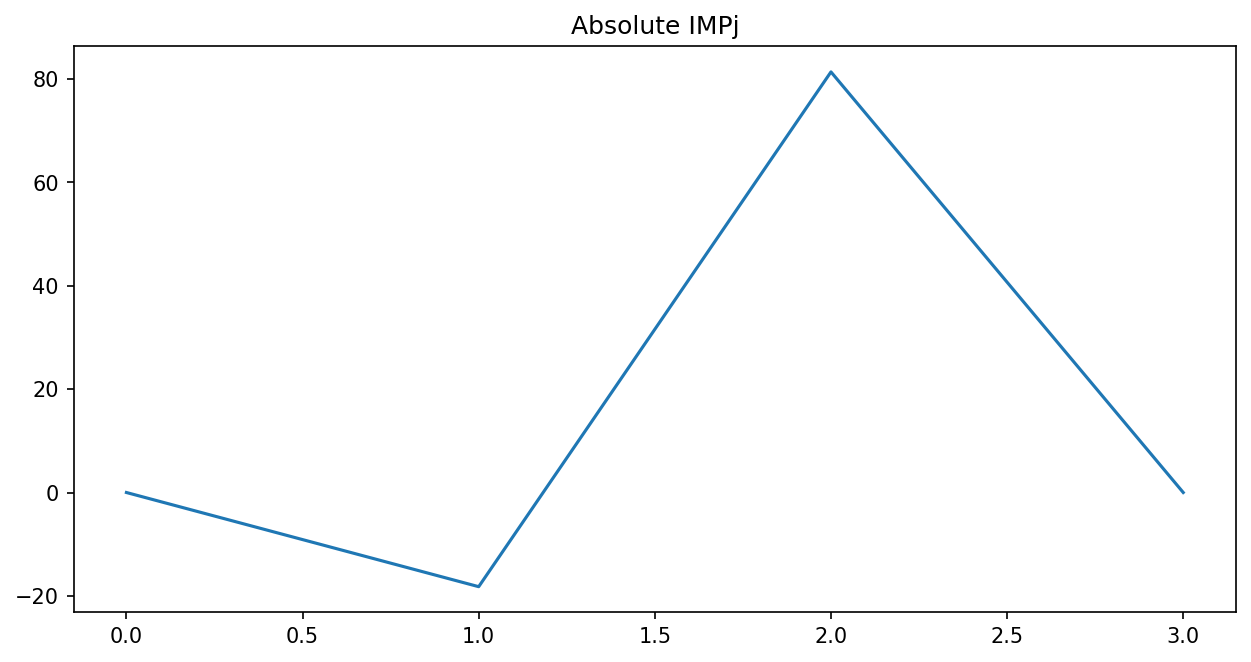

In [ ]:
plt.figure(figsize=[10,5],dpi=150)
plt.plot(IMPj2)
plt.title("Absolute IMPj")
plt.savefig("Absolute IMPj2.png")
files.download("Absolute IMPj2.png")

In [ ]:
np.argmax(IMPj2)

2

Neuron 2 is maximum impact

In [ ]:
pd.DataFrame(np.abs(IMPj)).mean(axis=0) #Neuron 1 maximum impact

In [ ]:
###
N1 = IMPj[0]
N2 = IMPj[1]
N3 = IMPj[2]
N4 = IMPj[3]

In [ ]:
N1

array([21.61487  , 24.945194 ,  1.9668219,  4.045389 ], dtype=float32)

In [ ]:
#get same results by doing this
diff01 = np.abs(np.subtract(N1,N2)) 
diff02 = np.abs(np.subtract(N1,N3)) 
diff03 = np.abs(np.subtract(N1,N4)) 
diff04 = np.abs(np.subtract(N2,N3)) 
diff05 = np.abs(np.subtract(N2,N4))
diff06 = np.abs(np.subtract(N3,N4))

In [ ]:
differences = pd.DataFrame({'diff01':diff01,'diff02':diff02,'diff03':diff03,'diff04':diff04,'diff05':diff05,'diff06':diff06}, columns=['diff01',
                                                                                                                         'diff02','diff03','diff04',
                                                                                                                         'diff05','diff06'])

In [ ]:
differences

diff01      diff02      diff03      diff04      diff05     diff06
0  62.325249  177.615143  259.696564  239.940399  322.021790  82.081406
1  71.928040  204.981308  299.709442  276.909363  371.637482  94.728134
2   5.671219   16.161900   23.630810   21.833118   29.302029   7.468910
3  11.664649   33.242043   48.604210   44.906689   60.268856  15.362167

In [ ]:
#Find neuron with largest impact by getting average difference across rows
differences.mean(axis=1)

0    190.613419
1    219.982300
2     17.344664
3     35.674770
dtype: float32

In [ ]:
##Neuron 1 has maximum impact on Zt

### Input Neurons

In [ ]:
# Get input layer output 
get_input_layer_output2 = K.function([mlp_try2.layers[1].input],
                                  [mlp_try2.layers[0].output])
input_layer_output2 = get_input_layer_output2(Xtrain)[0]

In [ ]:
pd.DataFrame(input_layer_output)

In [ ]:
Xs = Xtrain.values
pd.DataFrame(Xs)

0           1           2   ...          15          16          17
0    106.690000  106.531999  101.487000  ...  106.790001  106.830002  106.769997
1     57.374000   57.486000   56.443000  ...   55.820000   55.070000   63.580002
2     70.745999   70.992999   72.697500  ...   69.779999   70.199997   70.570000
3    103.675998  104.227998  105.589999  ...  107.379997  104.629997  103.150002
4    102.950000  103.153001  104.148500  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
883   52.461999   54.231000   52.914500  ...   51.750000   51.240002   49.849998
884  113.517998  111.692998  112.688999  ...  115.000000  114.089996  114.379997
885   46.038000   44.921000   46.260000  ...   45.830002   46.279999   48.860001
886  118.612000  119.971000  119.250500  ...  118.199997  117.779999  117.580002
887   51.882000   50.898000   52.371500  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

In [ ]:
#Compute and display the mean activities X1 ... X18 of the 18 input neurons.
PROF_input=np.mean(Xs, axis=0)
pd.DataFrame(Xs)

0           1           2   ...          15          16          17
0    106.690000  106.531999  101.487000  ...  106.790001  106.830002  106.769997
1     57.374000   57.486000   56.443000  ...   55.820000   55.070000   63.580002
2     70.745999   70.992999   72.697500  ...   69.779999   70.199997   70.570000
3    103.675998  104.227998  105.589999  ...  107.379997  104.629997  103.150002
4    102.950000  103.153001  104.148500  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
883   52.461999   54.231000   52.914500  ...   51.750000   51.240002   49.849998
884  113.517998  111.692998  112.688999  ...  115.000000  114.089996  114.379997
885   46.038000   44.921000   46.260000  ...   45.830002   46.279999   48.860001
886  118.612000  119.971000  119.250500  ...  118.199997  117.779999  117.580002
887   51.882000   50.898000   52.371500  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

In [ ]:
pd.DataFrame(PROF_input).to_excel("Xs_mean_act.xlsx")
files.download("Xs_mean_act.xlsx")

In [ ]:
#Compute and display the mean activities X1 ... X18 of the 18 input neurons.
#first_layer_weights = mlp_try.layers[0].get_weights()[0]
#first_layer_weights
first_lay2 = first_layer_weights2
first_lay2

array([[ 0.05856067, -0.0393432 ,  0.541651  , -0.21936578],
       [ 0.14267182, -0.01415151, -0.3102124 , -0.12420261],
       [-0.197103  ,  0.24929653,  0.25381073, -0.12938786],
       [-0.01443768,  0.31212053,  0.59192115, -0.24365842],
       [-0.34484488, -0.4269212 ,  0.06483608, -0.20577899],
       [ 0.2650382 ,  0.11940798, -0.23971565, -0.40969878],
       [ 0.31625986,  0.25331768,  0.10706486, -0.37588796],
       [-0.22050628, -0.31508926, -0.202953  ,  0.17618084],
       [ 0.20797509, -0.11180859, -0.13939601, -0.3244723 ],
       [-0.3611892 ,  0.05867738, -0.07560441,  0.32722235],
       [ 0.3413602 ,  0.00753589, -0.1473209 ,  0.24775118],
       [-0.16682613,  0.21914288,  0.4338751 ,  0.16075814],
       [-0.35203657, -0.1489948 ,  0.1081759 ,  0.25946748],
       [ 0.43324155, -0.07182146,  0.29084313, -0.05513242],
       [-0.21873102,  0.14939983, -0.09842501, -0.21223933],
       [-0.39271525,  0.14756615, -0.27394792, -0.36828178],
       [-0.02189159, -0.

In [ ]:
#Display all the weights U1 ... U18 linking the input nodes INP1 ... INP18 to the neuron NOD*
#Get weights for N1
N2_weights = first_lay2[:,2]
N2_weights

array([ 0.541651  , -0.3102124 ,  0.25381073,  0.59192115,  0.06483608,
       -0.23971565,  0.10706486, -0.202953  , -0.13939601, -0.07560441,
       -0.1473209 ,  0.4338751 ,  0.1081759 ,  0.29084313, -0.09842501,
       -0.27394792,  0.2710558 ,  0.5826389 ], dtype=float32)

In [ ]:
pd.DataFrame(N2_weights).to_excel("N2_weights.xlsx")
files.download("N2_weights.xlsx")

In [ ]:
PROF_input

array([94.32956761, 94.14141109, 93.74147865, 93.34324325, 93.46436945,
       93.56441442, 93.61238744, 93.71182435, 93.77603609, 93.88530415,
       93.96046177, 94.03608111, 94.10838972, 94.17902034, 94.23626129,
       94.35729739, 94.40665542, 94.46860362])

In [ ]:
PROF_input_reshaped.shape 

In [ ]:
N1_w_reshaped = N1_weights.values.reshape(18,1)
N1_w_reshaped.shape

(18, 1)

In [ ]:
Fs2 = N13_weights*PROF_input

In [ ]:
pd.DataFrame(Fs)

0
0    6.810234
1   20.749188
2    4.344765
3   -2.845986
4   30.481869
5    1.654915
6   20.751878
7   36.588989
8   33.248520
9   13.092697
10  27.698845
11   4.422823
12  11.476829
13  18.306166
14  30.624287
15   8.904583
16  27.378284
17  -1.438305

In [ ]:
Fs_abs2 = np.abs(Fs2)
#Fs_avg = pd.DataFrame(Fs_abs.mean(axis=0))

In [ ]:
pd.DataFrame(Fs_abs2).to_excel("Fs_absolute2.xlsx")
files.download("Fs_absolute2.xlsx")

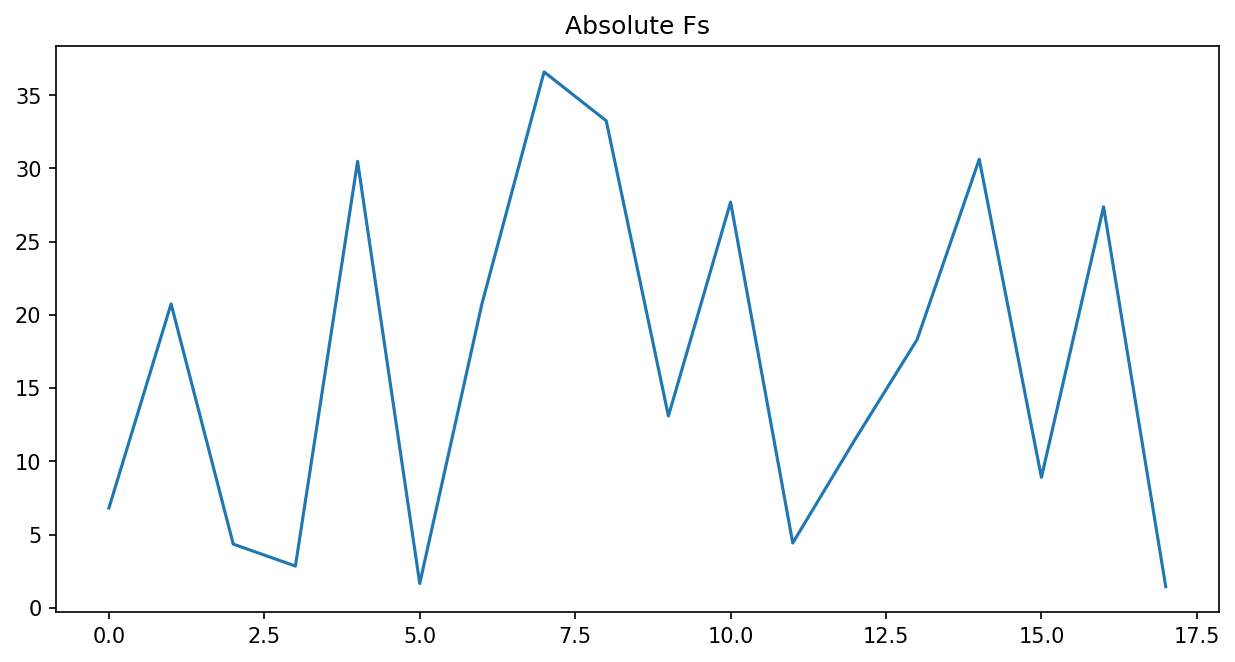

In [ ]:
plt.figure(figsize=[10,5],dpi=150)
plt.plot(Fs_abs2)
plt.title("Absolute Fs")
plt.savefig("Absolute Fs2.png")
files.download("Absolute Fs2.png")

In [ ]:
top52 = np.argsort(Fs_abs2)[::-1][:5]

In [ ]:
top52

array([ 7,  8, 14,  4, 10])

In [ ]:
Xtrain.columns[top52]

Index(['S(t-10)', 'S(t-9)', 'S(t-3)', 'S(t-13)', 'S(t-7)'], dtype='object')

# Optimize Model

In [ ]:
print(Ytest.shape)
print(Ytrain.shape)

(99,)
(888,)


In [ ]:
print(Xtest.shape)
print(Xtrain.shape)

(99, 18)
(888, 18)


In [ ]:
Y_train = np.reshape(Ytrain.values,(888,1))
Y_test = np.reshape(Ytest.values,(99,1))

In [ ]:
Y_train.shape

(888, 1)

In [ ]:
pd.DataFrame(Y_train)

0
0    104.910004
1     66.449997
2     73.199997
3    101.959999
4    102.709999
..          ...
883   51.849998
884  114.760002
885   50.070000
886  119.239998
887   51.490002

[888 rows x 1 columns]

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

#Optimize model
def model_opt(h=4,b_hid = 5, b_out=40, lr=0.001):
  model = Sequential()
  model.add(Dense(h, activation='relu', input_dim=18, bias_initializer=Constant(value=b_hid)))
  model.add(Dense(1, activation='relu', bias_initializer=Constant(value=b_out)))
  model.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='mean_squared_error')
  return model

In [ ]:
l_r = [0.001, 0.0001, 0.00001, 0.0000001]
epochs = [900]
batches = [30, 50, 70, 90, 120]
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
param_grid = dict(lr=l_r, epochs=epochs, batch_size=batches)

In [ ]:
model=KerasRegressor(build_fn=model_opt,verbose=0)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(Xtrain.values, Y_train,callbacks=[es],validation_data = (Xtrain.values,Y_train),verbose = 1)

Streaming output truncated to the last 5000 lines.
24/24 [==============================] - 0s 5ms/step - loss: 4022.7820 - val_loss: 1505.5885
Epoch 2/900
24/24 [==============================] - 0s 4ms/step - loss: 623.6030 - val_loss: 163.8800
Epoch 3/900
24/24 [==============================] - 0s 3ms/step - loss: 155.9672 - val_loss: 150.0106
Epoch 4/900
24/24 [==============================] - 0s 3ms/step - loss: 151.7940 - val_loss: 143.3362
Epoch 5/900
24/24 [==============================] - 0s 3ms/step - loss: 149.4023 - val_loss: 143.4148
Epoch 6/900
24/24 [==============================] - 0s 4ms/step - loss: 148.9787 - val_loss: 143.2127
Epoch 7/900
24/24 [==============================] - 0s 4ms/step - loss: 148.9389 - val_loss: 143.1461
Epoch 8/900
24/24 [==============================] - 0s 4ms/step - loss: 148.8487 - val_loss: 143.0797
Epoch 9/900
24/24 [==============================] - 0s 3ms/step - loss: 148.8010 - val_loss: 142.9697
Epoch 10/900
24/24 [============

In [ ]:
#Get best parameters 
print("Best results : %f with parameters %s" % (grid_result.best_score_, grid_result.best_params_))

Best results : -11.614396 with parameters {'batch_size': 30, 'epochs': 900, 'lr': 1e-05}


Best results resulted from batch size of 30

In [ ]:
l_r = [0.00001]
epochs = [300]
batches = [30]
k_val = [4,10,25,40]
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
param_grid = dict(lr=l_r, epochs=epochs, batch_size=batches,h=k_val)

In [ ]:
model=KerasRegressor(build_fn=model_opt,verbose=0)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(Xtrain.values, Y_train,callbacks=[es],validation_data = (Xtrain.values,Y_train),verbose = 1)

Streaming output truncated to the last 5000 lines.
24/24 [==============================] - 0s 4ms/step - loss: 46.4616 - val_loss: 42.7279
Epoch 104/300
24/24 [==============================] - 0s 4ms/step - loss: 44.9045 - val_loss: 42.2965
Epoch 105/300
24/24 [==============================] - 0s 3ms/step - loss: 44.3945 - val_loss: 42.7881
Epoch 106/300
24/24 [==============================] - 0s 4ms/step - loss: 50.8317 - val_loss: 40.5847
Epoch 107/300
24/24 [==============================] - 0s 4ms/step - loss: 45.6118 - val_loss: 40.7585
Epoch 108/300
24/24 [==============================] - 0s 4ms/step - loss: 42.3005 - val_loss: 39.1873
Epoch 109/300
24/24 [==============================] - 0s 4ms/step - loss: 40.8572 - val_loss: 39.6260
Epoch 110/300
24/24 [==============================] - 0s 4ms/step - loss: 42.1648 - val_loss: 39.4394
Epoch 111/300
24/24 [==============================] - 0s 4ms/step - loss: 38.5722 - val_loss: 37.7773
Epoch 112/300
24/24 [===============

In [ ]:
#Get best parameters 
print("Best results : %f with parameters %s" % (grid_result.best_score_, grid_result.best_params_))

Best results : -9.483079 with parameters {'batch_size': 30, 'epochs': 300, 'h': 25, 'lr': 1e-05}


best parameters are batch size of 30, learning rate of 0.00001, and hidden layer size of 25

## Use Optimized model results

In [ ]:
#Compute number of weights and thresholds
#comp = I x h + h x 1 + b_hidd + b_out
comp = 18*25+25*1+25+1
comp
##There are 501 weights and thresholds### number of information 

501

In [ ]:
Xtrain.size / 501

31.904191616766468

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

# constructing the autoencoder

# determine h through PCA on your own data
# try to find suitable initializers for your own data
h = 25
mlp_try = Sequential()
mlp_try.add(Dense(h, activation='relu', input_dim=18, bias_initializer=Constant(value=5)))
mlp_try.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp_try.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 25)                475       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 26        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_try.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='mean_squared_error')

In [ ]:
mlp_try.layers[0].get_weights()

In [ ]:
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
      
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(logs['loss'])
      self.MSEtest.append(logs['loss'])

mlpMyMonitor = mlpMyHistory()

# For saving the best model during the whole training process.
checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)

In [ ]:
mlpMonitor = mlp_try.fit(Xtrain, Y_train, epochs=900, batch_size=30, callbacks = [mlpMyMonitor, es], validation_data = (Xtest, Y_test), verbose = 1)

Epoch 1/900
30/30 [==============================] - 0s 4ms/step - loss: 14.3548 - val_loss: 11.7451
Epoch 2/900
30/30 [==============================] - 0s 3ms/step - loss: 13.0464 - val_loss: 11.8350
Epoch 3/900
30/30 [==============================] - 0s 3ms/step - loss: 12.9624 - val_loss: 11.5244
Epoch 4/900
30/30 [==============================] - 0s 3ms/step - loss: 13.1561 - val_loss: 15.2380
Epoch 5/900
30/30 [==============================] - 0s 3ms/step - loss: 12.9292 - val_loss: 11.4968
Epoch 6/900
30/30 [==============================] - 0s 3ms/step - loss: 13.6840 - val_loss: 12.8572
Epoch 7/900
30/30 [==============================] - 0s 4ms/step - loss: 12.7842 - val_loss: 12.9938
Epoch 8/900
30/30 [==============================] - 0s 3ms/step - loss: 12.7869 - val_loss: 11.6313
Epoch 9/900
30/30 [==============================] - 0s 3ms/step - loss: 12.8062 - val_loss: 11.7156
Epoch 10/900
30/30 [==============================] - 0s 3ms/step - loss: 12.9534 - val_los

### RMSETrain and RMSETest for HL= 25

In [ ]:
round(mlp_try.evaluate(Xtest,Y_test),2)


4/4 [==============================] - 0s 1ms/step - loss: 5.4561


5.46

In [ ]:
#Get MSETrain and MSETest
MSETrain = mlpMyMonitor.MSEtrain
MSETest = mlpMyMonitor.MSEtest
#Get RMSETrain and RMSETest
RMSETrain = np.sqrt(MSETrain)
RMSETest = np.sqrt(MSETest)

In [ ]:
y_train_pred = mlp_try.predict(Xtrain)
y_test_pred = mlp_try.predict(Xtest)

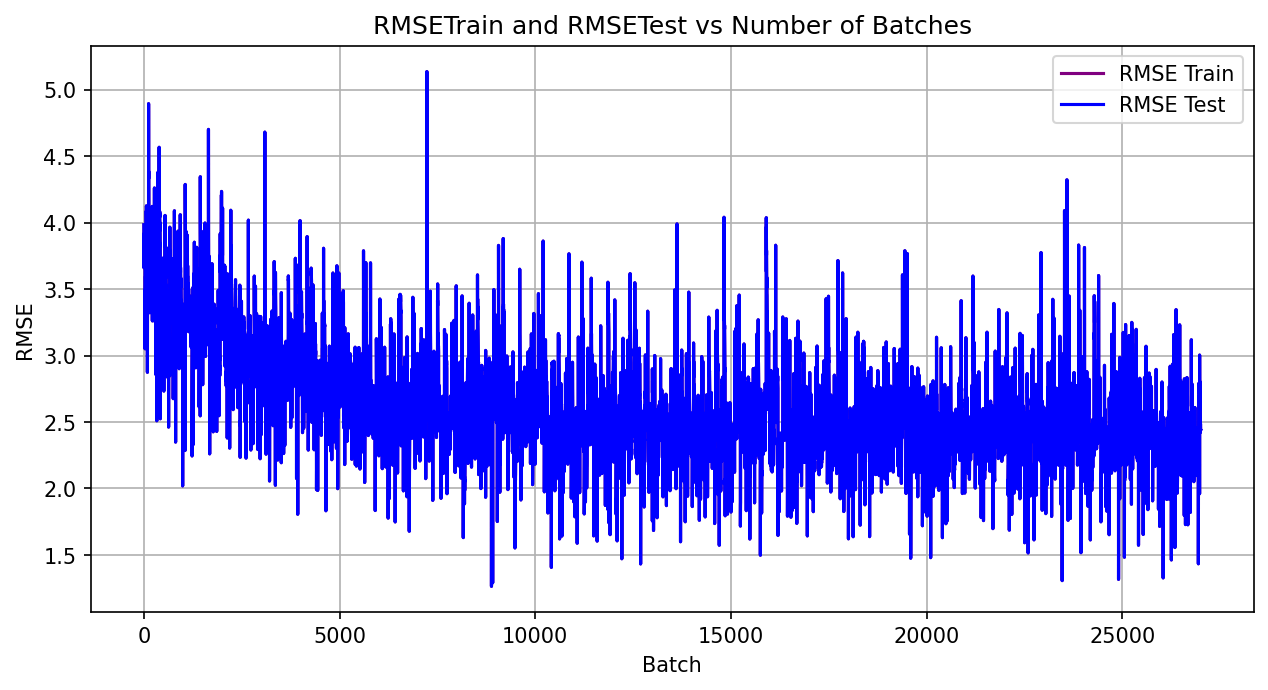

In [ ]:
fig = plt.figure(figsize=[10,5],dpi=150)
ax = fig.add_subplot(111)
ax.plot(RMSETrain, color = 'purple', label = 'RMSE Train')
ax.plot(RMSETest, color = 'blue', label = 'RMSE Test') 
ax.set(title='RMSETrain and RMSETest vs Number of Batches', ylabel='RMSE', xlabel='Batch')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig("RSME.png")
files.download('RSME.png')

In [ ]:
print("RMSETrain max and min: ", round(max(RMSETrain),4), round(min(RMSETrain),4))
print("MSETest max and min: ", round(max(RMSETest),4), round(min(RMSETest),4))

RMSETrain max and min:  5.1359 1.2636
MSETest max and min:  5.1359 1.2636


In [ ]:
np.average(RMSETrain)
np.average(RMSETest)

2.6246178664125703

### Plot TARGt and Zt

In [ ]:
train_comp = pd.DataFrame(Y_train)
train_comp['Zt'] = y_train_pred

In [ ]:
train_comp.rename(columns={0: "TARGt"}, inplace=True)

In [ ]:
train_comp_sorted = train_comp.sort_index()

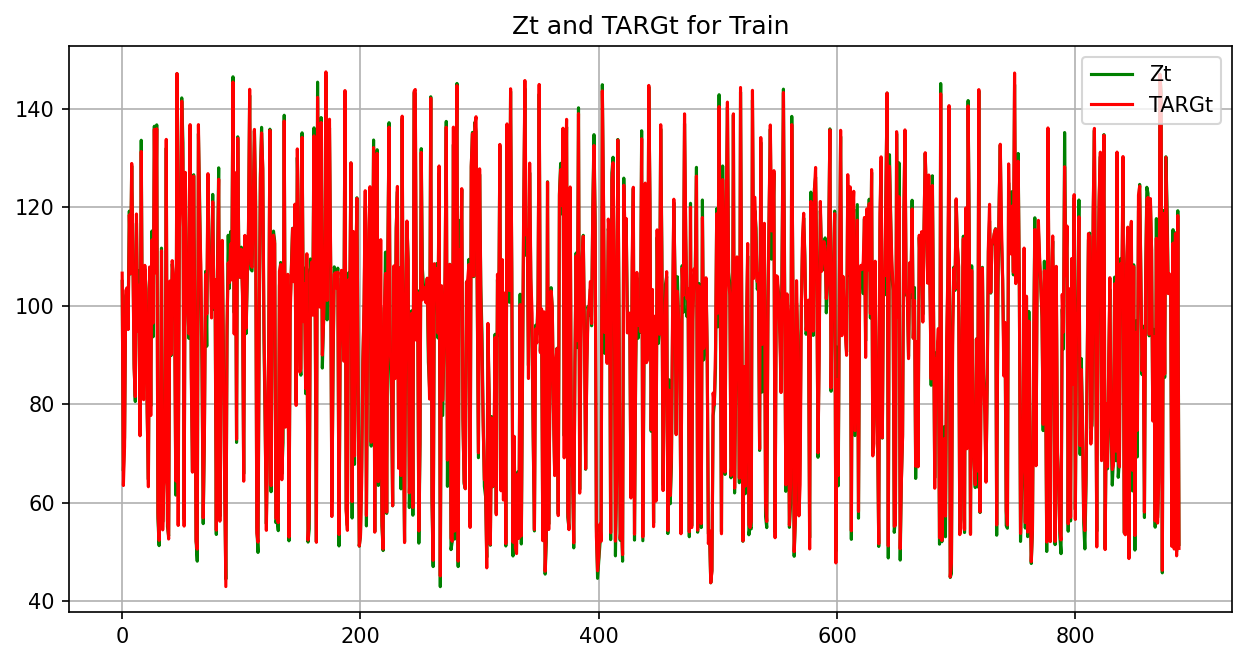

In [ ]:
fig = plt.figure(figsize=[10,5],dpi=150)
ax = fig.add_subplot(111)
ax.plot(train_comp_sorted.TARGt, color = 'green', label = 'Zt')
ax.plot(train_comp_sorted.Zt, color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Train')
plt.legend()
plt.grid(True)
plt.show()

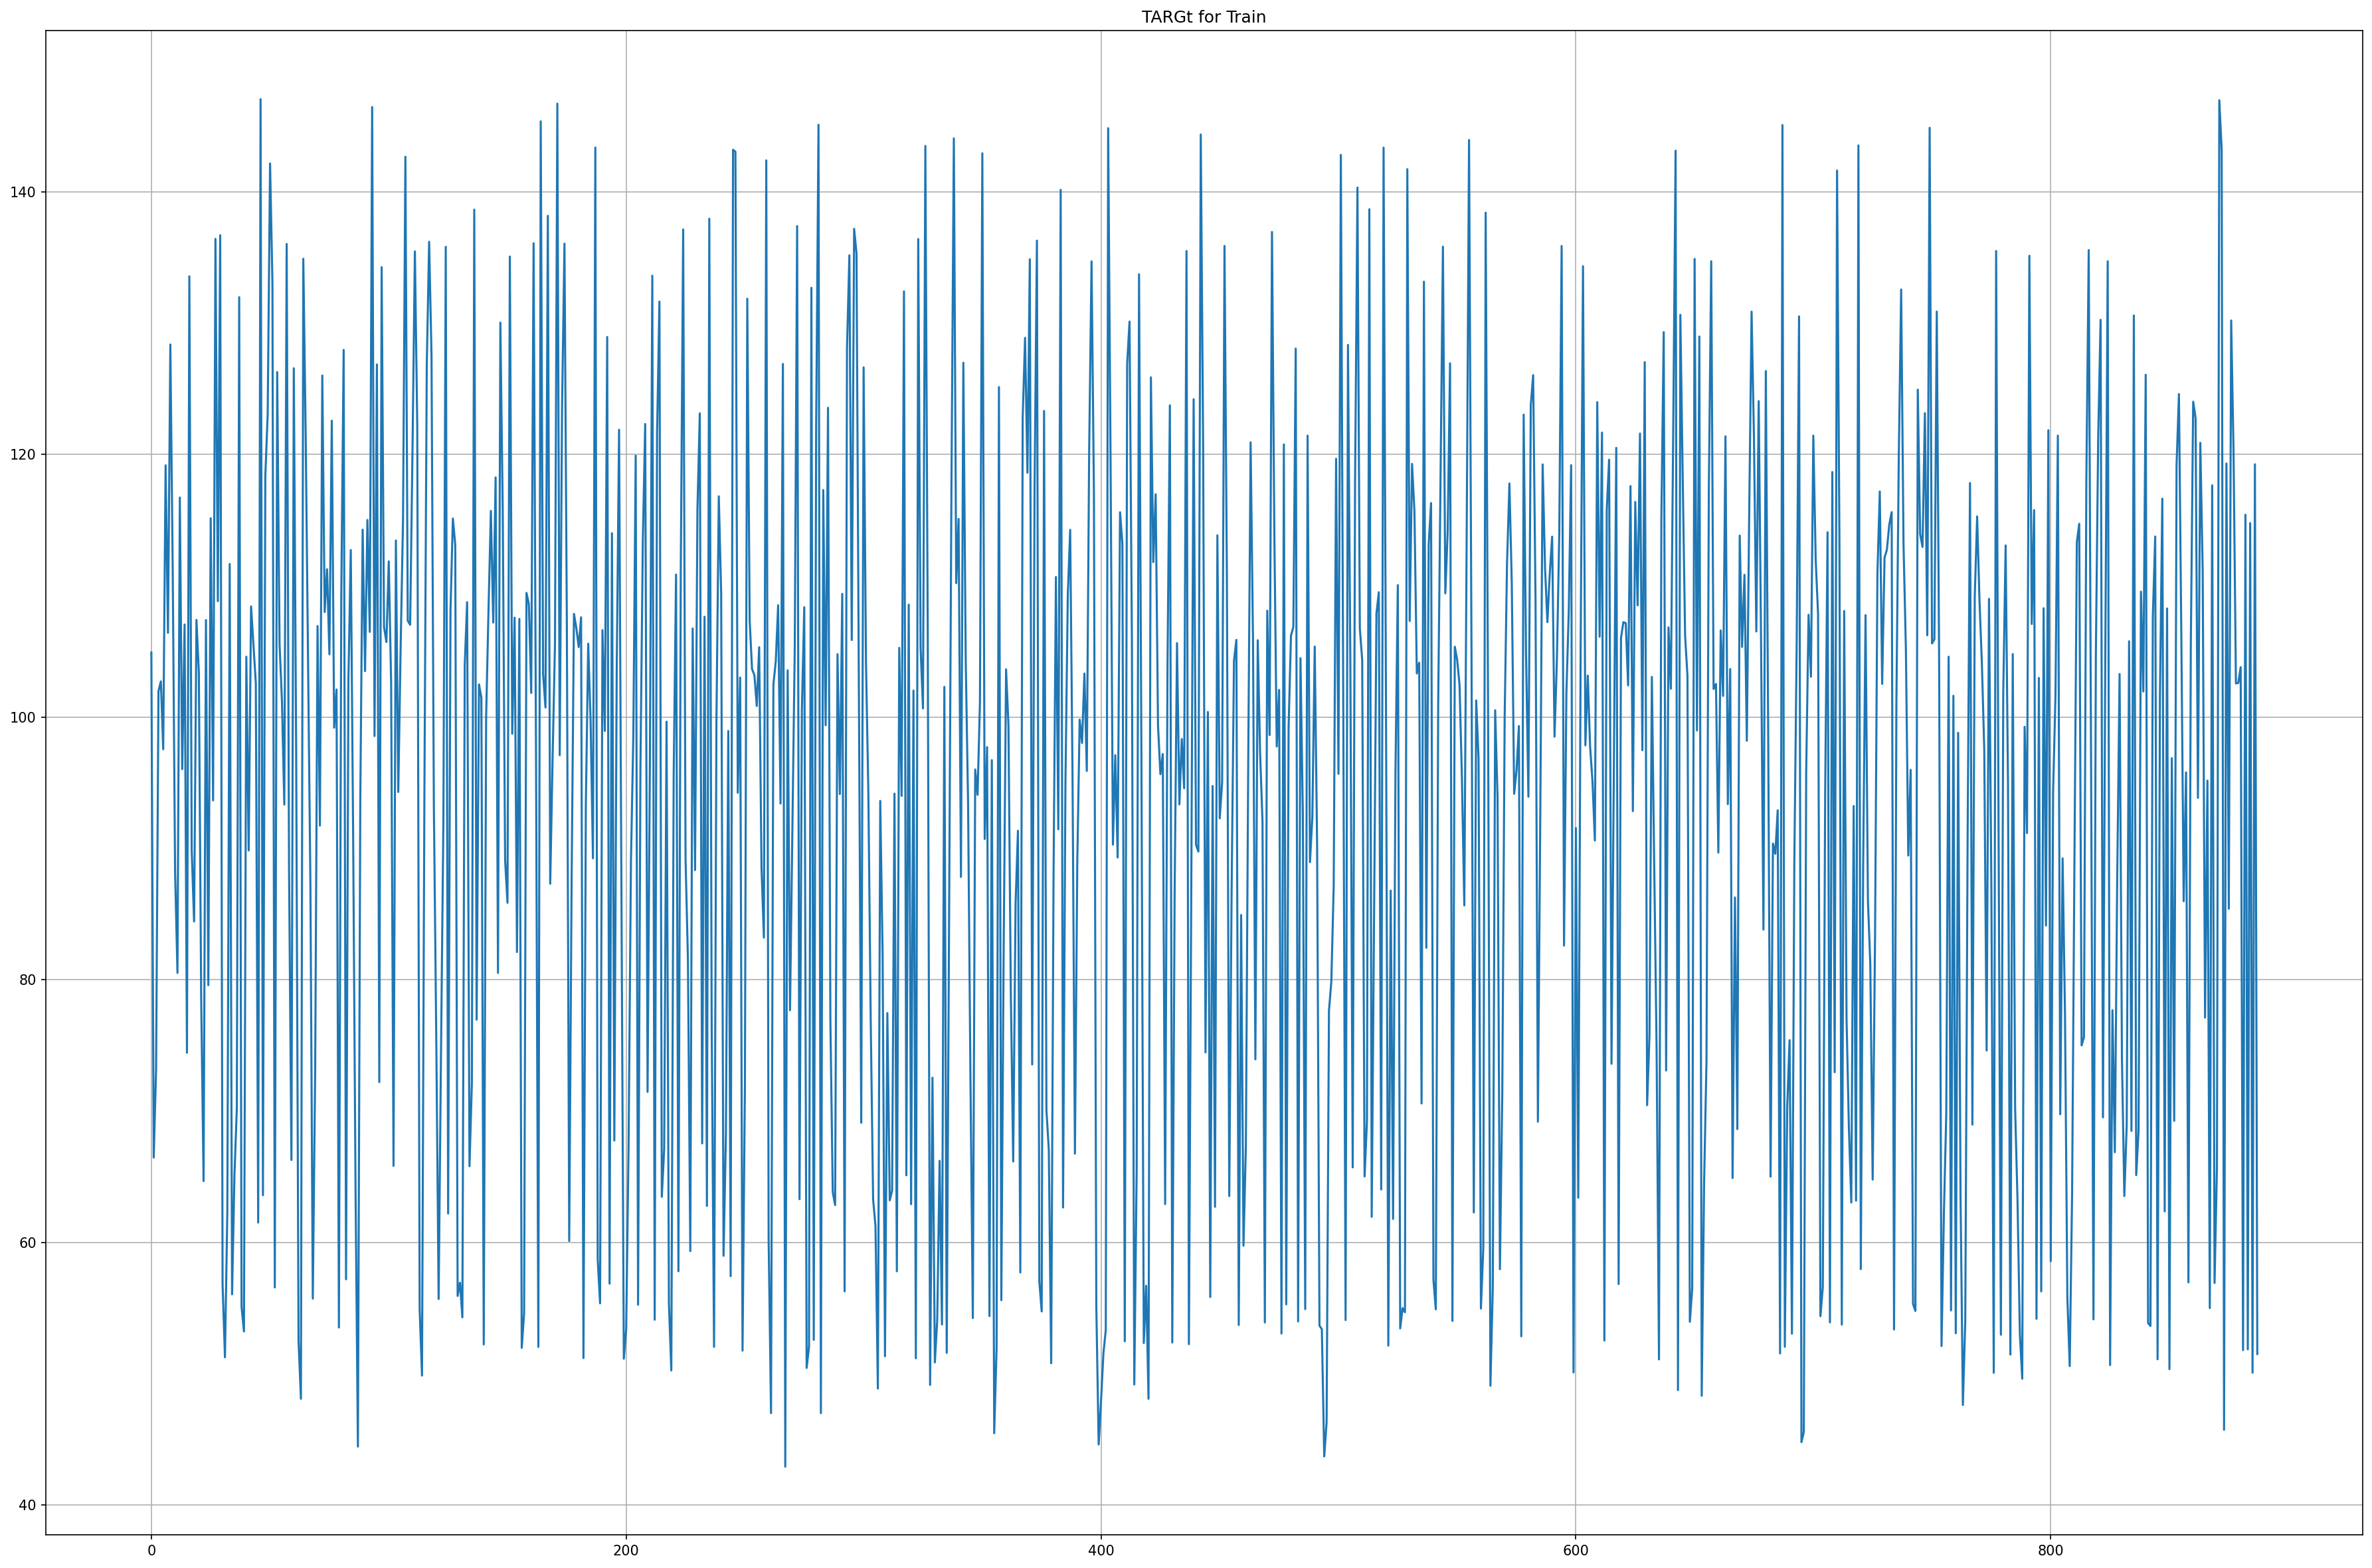

In [ ]:
plt.figure(figsize=[30,20],dpi=150)
plt.plot(Y_train)
plt.title("TARGt for Train")
plt.grid(True)
#plt.show()
from google.colab import files
plt.savefig('TARGt_train1.png')
files.download('TARGt_train1.png')

In [ ]:
fig = plt.figure(figsize=[10,5],dpi=150)
ax.plot(Y_train, color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Train')
plt.legend()
plt.grid(True)
#plt.show()
from google.colab import files
fig.savefig('COMPARE_TRAIN.png')
files.download('COMPARE_TRAIN.png')

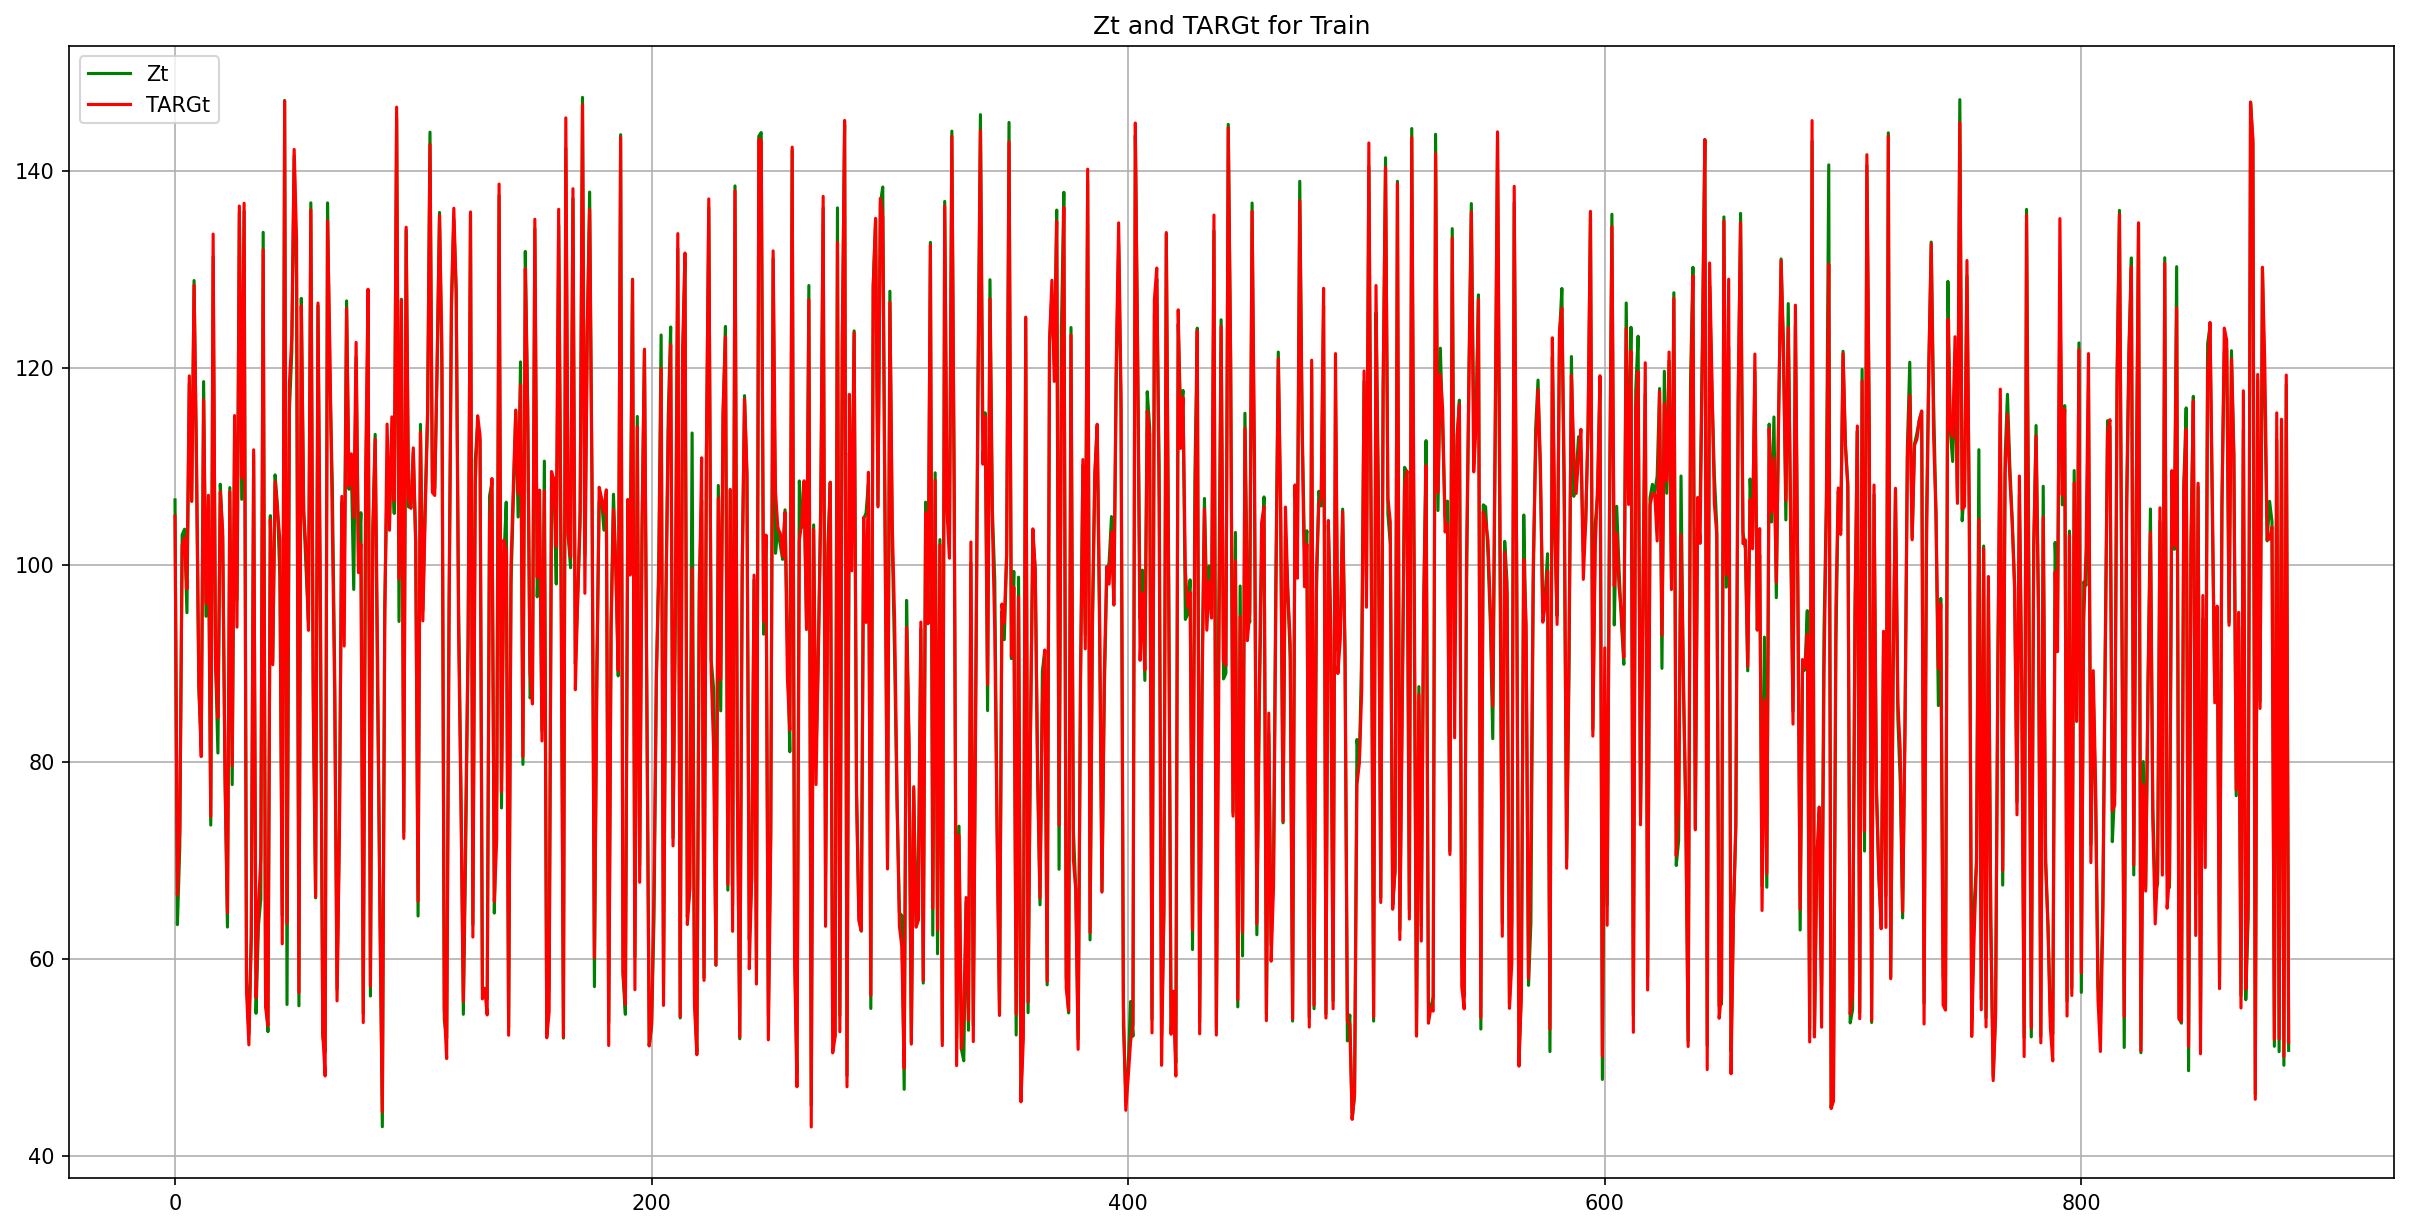

In [ ]:
fig = plt.figure(figsize=[20,10],dpi=150)
ax = fig.add_subplot(111)
ax.plot(y_train_pred, color = 'green', label = 'Zt')
ax.plot(Y_train, color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Train')
plt.legend()
plt.grid(True)
#plt.show()
from google.colab import files
fig.savefig('COMPARE_TRAIN.png')
files.download('COMPARE_TRAIN.png')

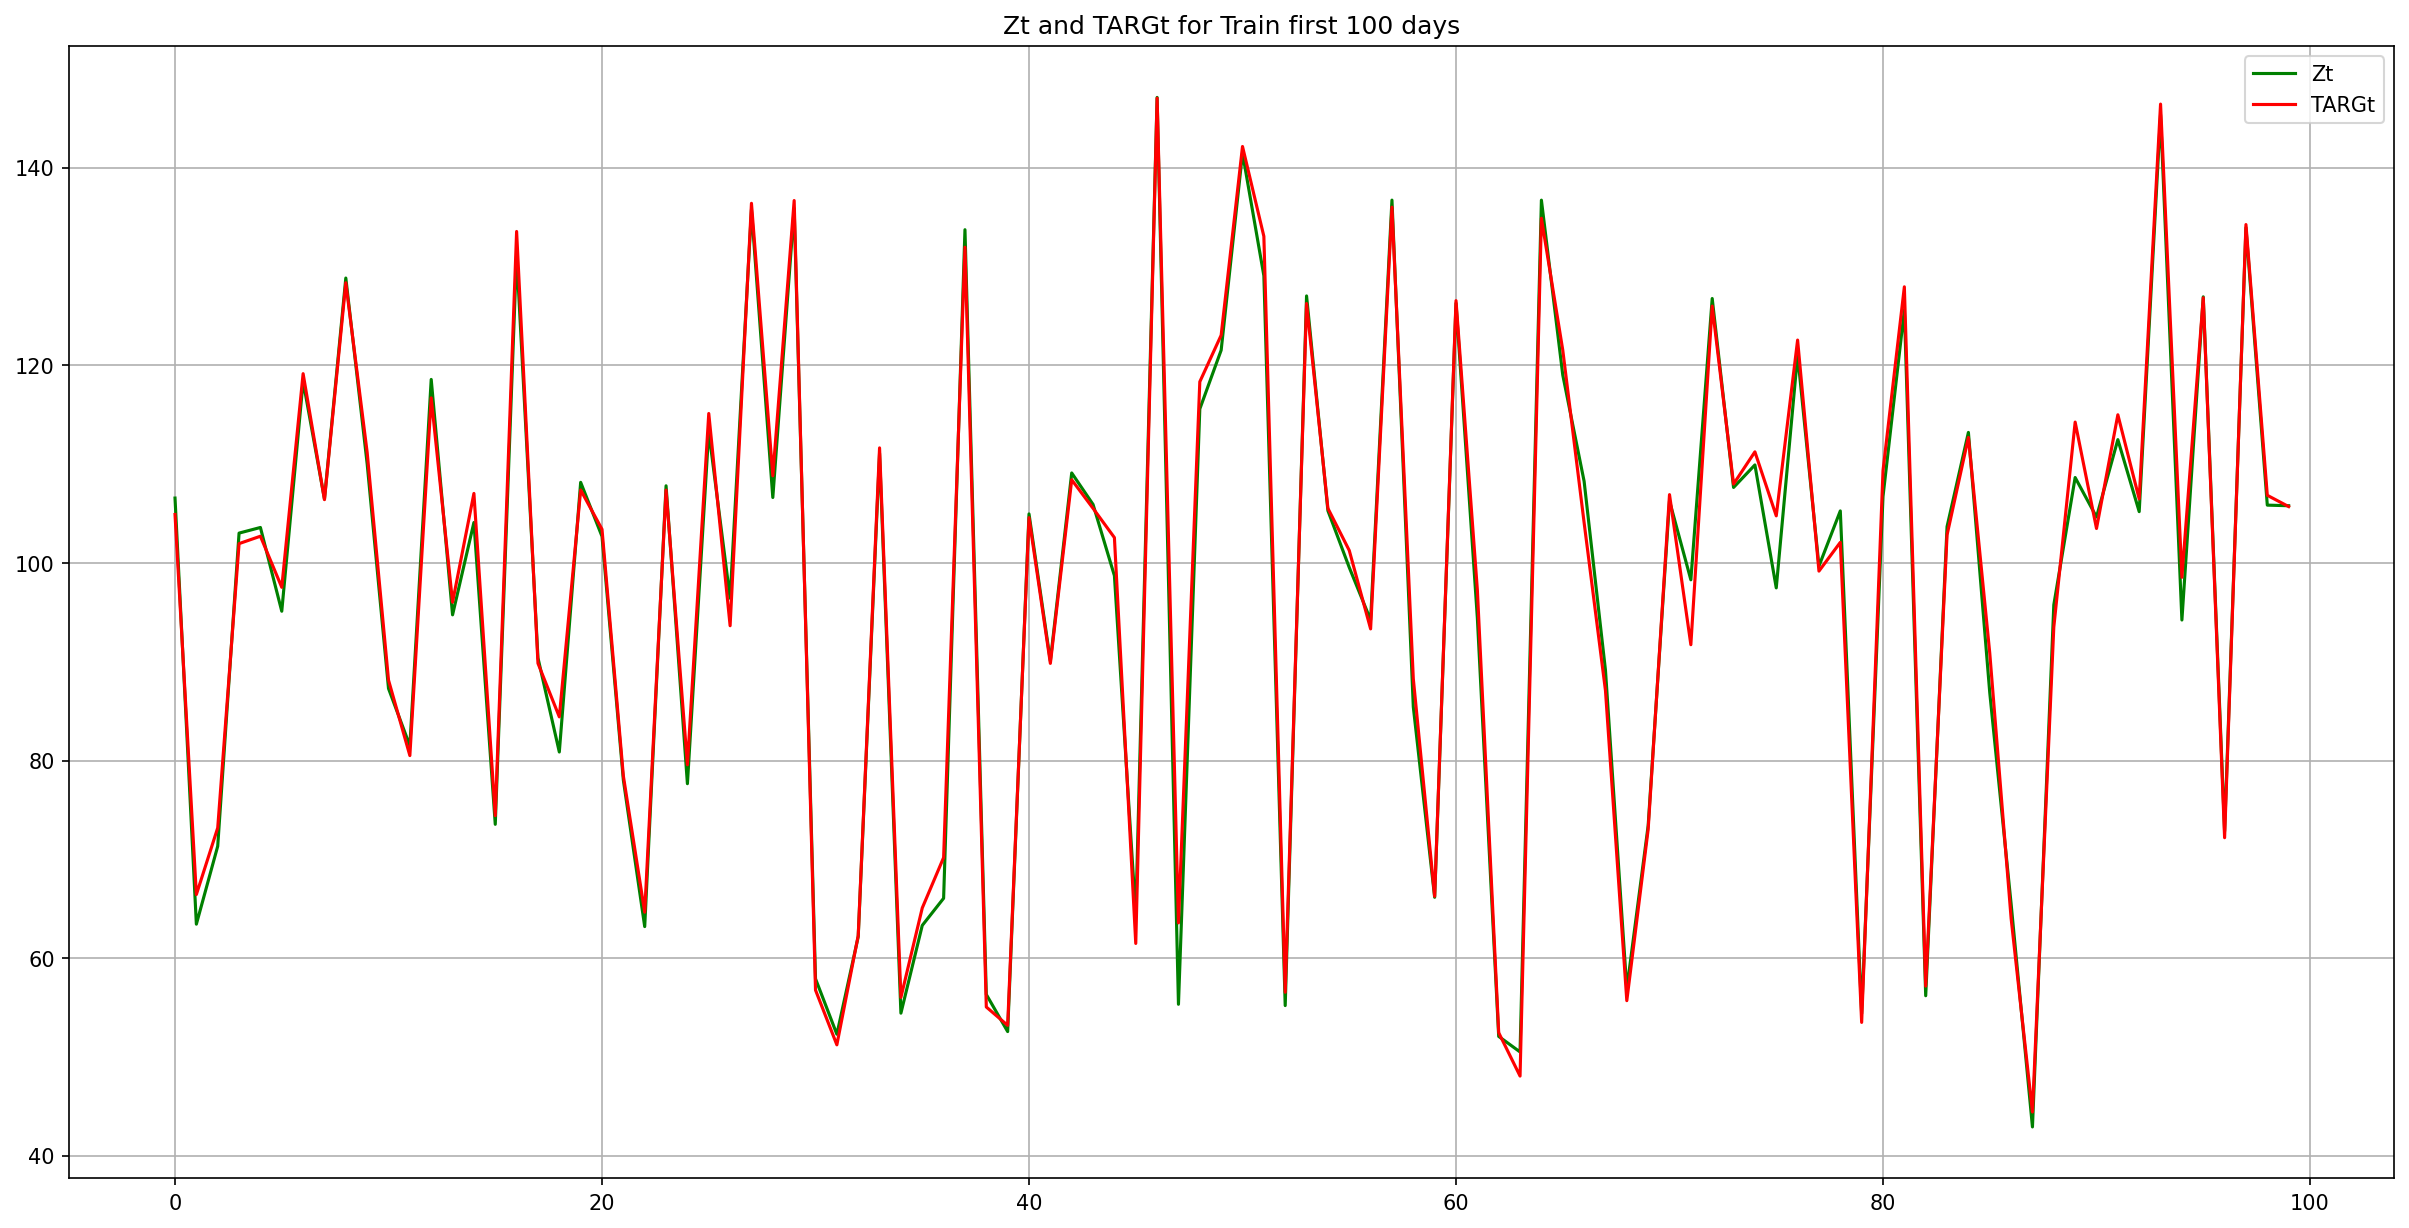

In [ ]:
fig = plt.figure(figsize=[20,10],dpi=150)
ax = fig.add_subplot(111)
ax.plot(y_train_pred[:100], color = 'green', label = 'Zt')
ax.plot(Y_train[:100], color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Train first 100 days')
plt.legend()
plt.grid(True)
fig.savefig('COMPARE_TRAIN_100.png')
files.download('COMPARE_TRAIN_100.png')

In [ ]:
Y_train[:20]

array([[104.910004],
       [ 66.449997],
       [ 73.199997],
       [101.959999],
       [102.709999],
       [ 97.540001],
       [119.160004],
       [106.410004],
       [128.360001],
       [111.190002],
       [ 88.150002],
       [ 80.510002],
       [116.709999],
       [ 96.029999],
       [107.040001],
       [ 74.43    ],
       [133.550003],
       [ 89.849998],
       [ 84.43    ],
       [107.389999]])

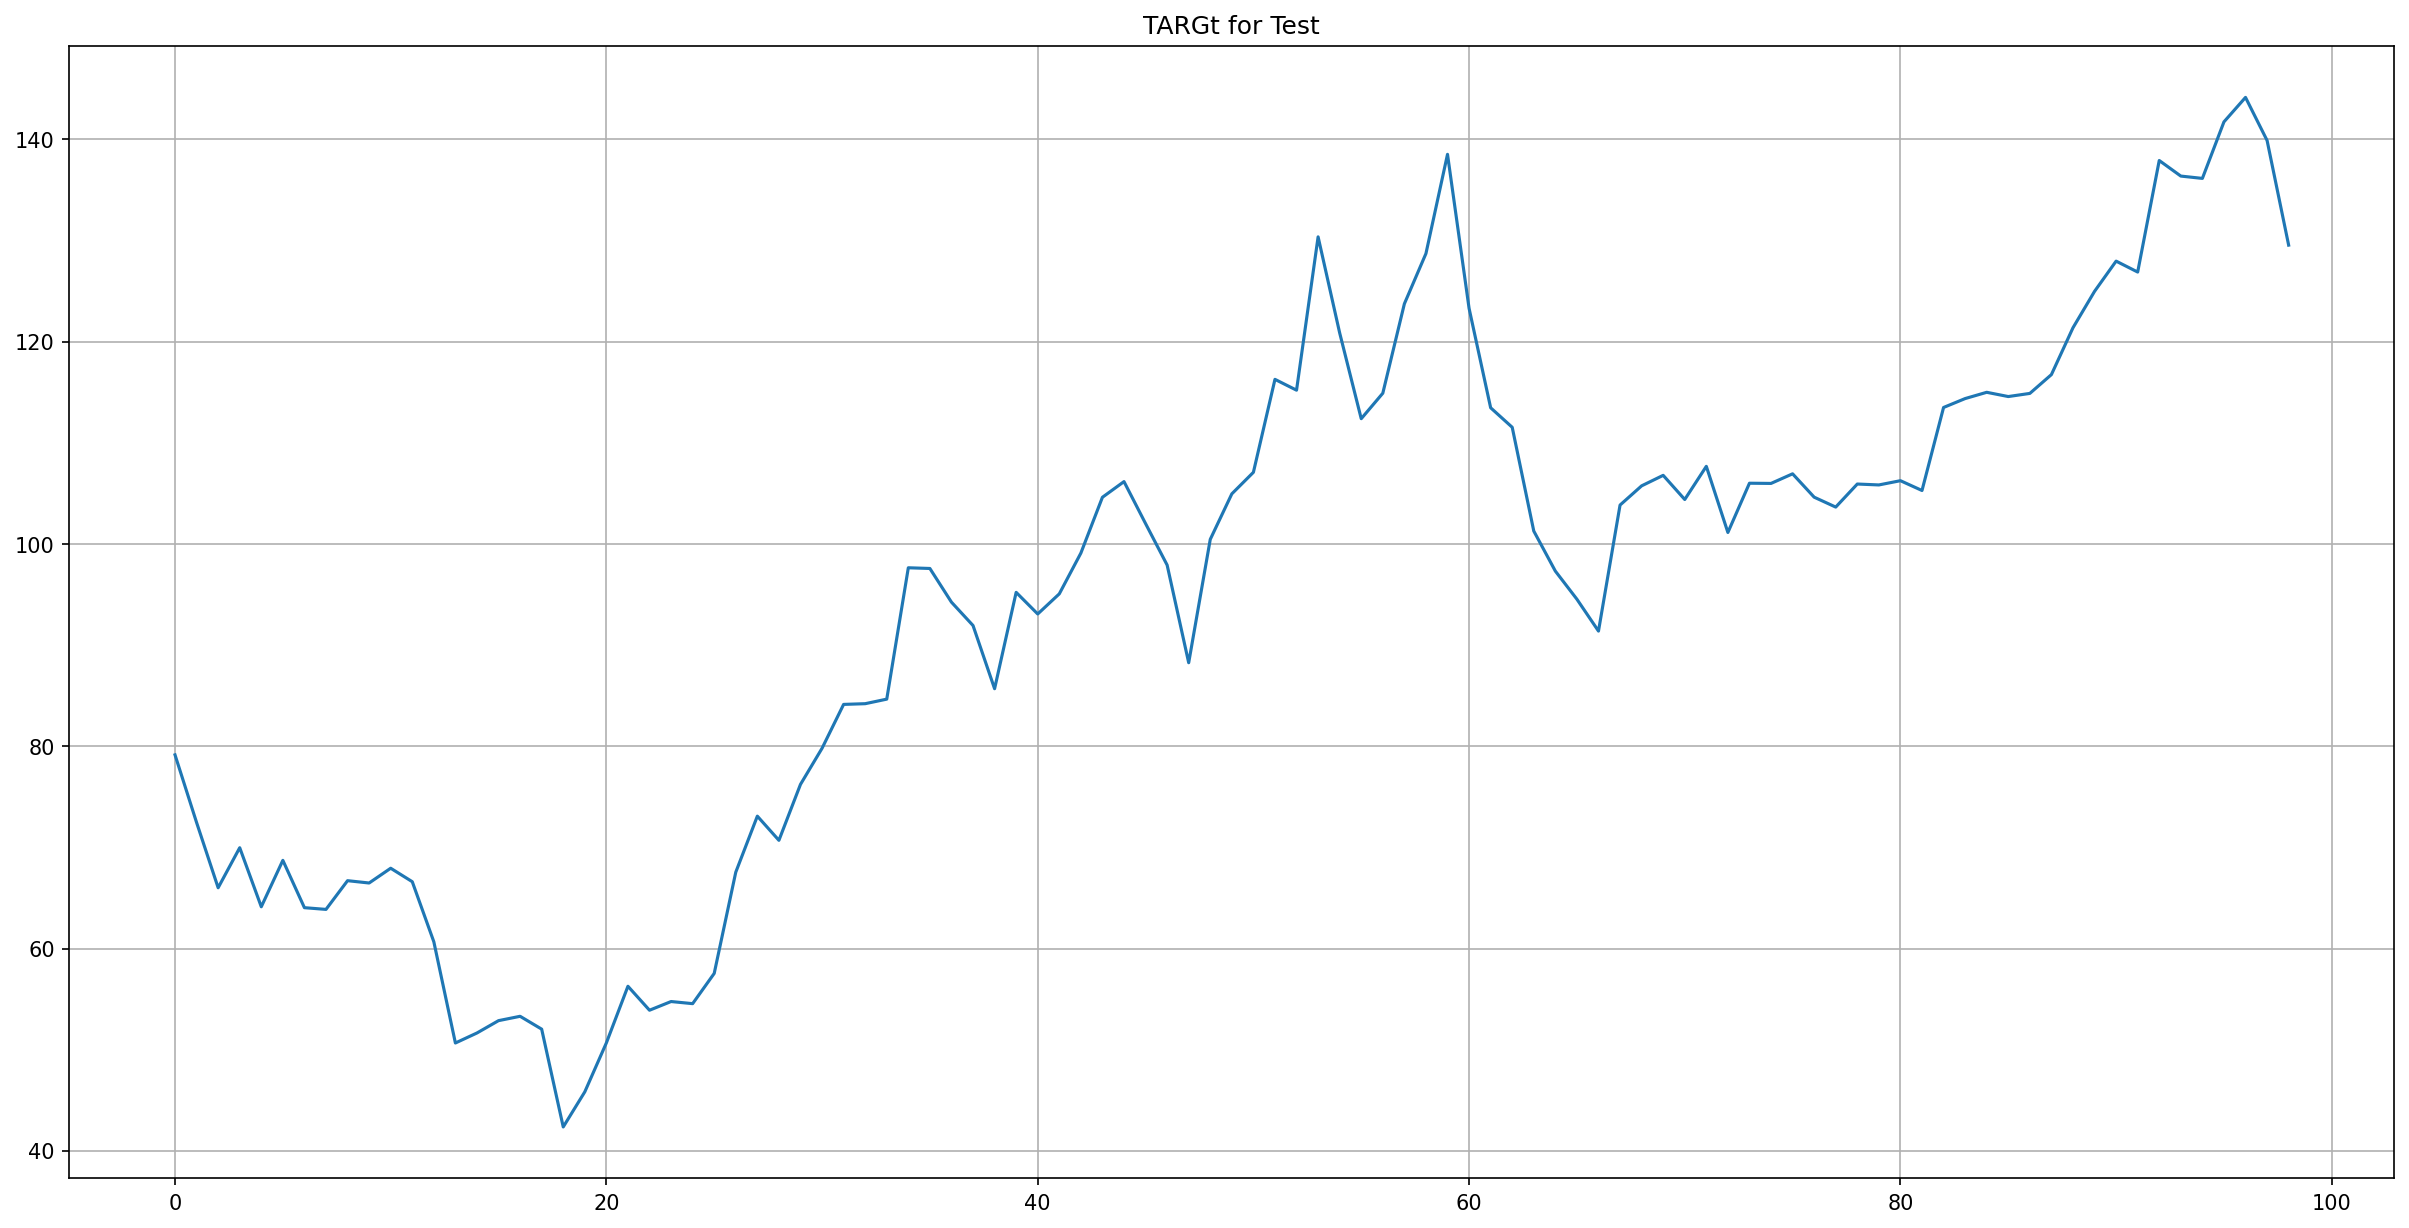

In [ ]:
plt.figure(figsize=[20,10],dpi=150)
plt.plot(Y_test)
plt.title("TARGt for Test")
plt.grid(True)
#plt.show()
from google.colab import files
plt.savefig('TARGt_test.png')
files.download('TARGt_test.png')

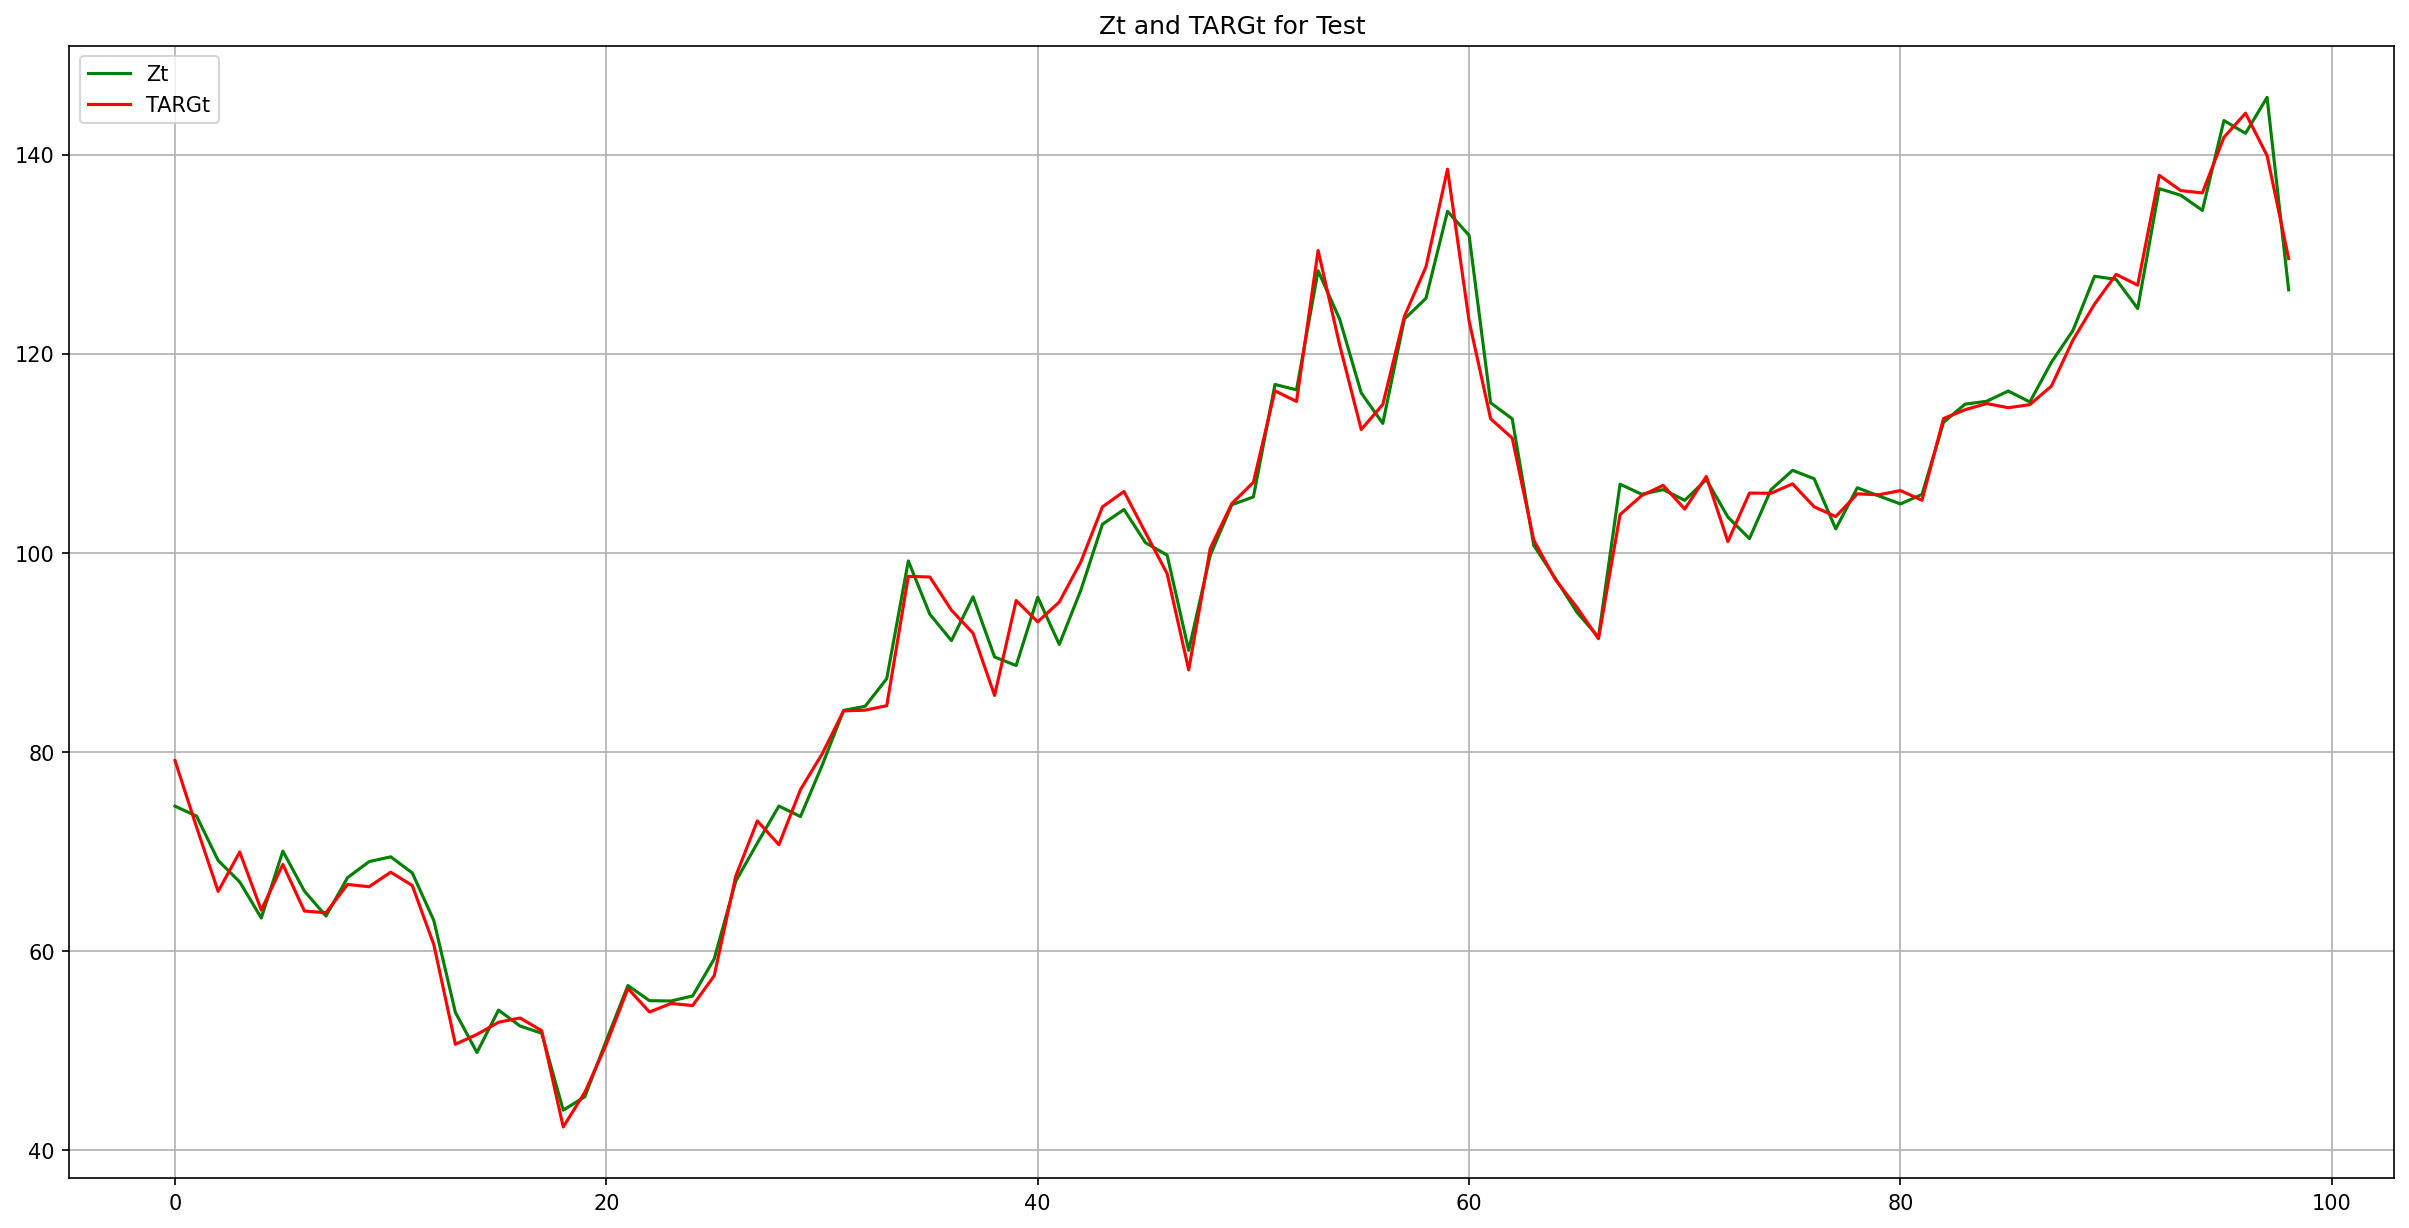

In [ ]:
fig = plt.figure(figsize=[20,10],dpi=150)
ax = fig.add_subplot(111)
ax.plot(y_test_pred, color = 'green', label = 'Zt')
ax.plot(Y_test, color = 'red', label = 'TARGt')
ax.set(title='Zt and TARGt for Test')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('COMPARE_TEST.png')
files.download('COMPARE_TEST.png')

### MREP

In [ ]:
#Compute MREP(NewTest) = avg(|Zt - TARGt| / TARGt)
MREP_Train = np.average(abs(y_train_pred - Y_train) / Y_train)
MREP_Test = np.average(abs(y_test_pred - Y_test) / Y_test)

In [ ]:
print("MREP Train: ", round(MREP_Train, 4))
print("MREP Test: ", round(MREP_Test,4))

MREP Train:  0.0184
MREP Test:  0.0197


In [ ]:
CI_TRAIN = MREP_Train + np.array([-1,1])*norm.ppf(1.95/2)*np.sqrt(MREP_Train*(1-MREP_Train)/888)
CI_TRAIN

array([0.00957091, 0.0272558 ])

In [ ]:
CI_TEST = MREP_Test + np.array([-1,1])*norm.ppf(1.95/2)*np.sqrt(MREP_Test*(1-MREP_Test)/99)
CI_TEST

array([-0.00767572,  0.04706688])

### Get weights 

In [ ]:
#################################Try getting weights/outputs of each layer######################
weights = [layer.get_weights() for layer in mlp_try.layers]

In [ ]:
weights

[[array([[ 0.53880227,  0.40818906, -0.31703356, -0.08901407],
         [ 0.56733483,  0.20090483, -0.5548935 , -0.07149179],
         [-0.45412567,  0.08335107,  0.38579616, -0.4485658 ],
         [-0.24664591,  0.19040008, -0.13395515, -0.02507238],
         [ 0.05407361, -0.13921414, -0.14255117,  0.40657714],
         [ 0.32743397, -0.14559205, -0.01523916, -0.17248176],
         [ 0.20662454,  0.22969542,  0.35401967, -0.10380604],
         [ 0.46784118, -0.15871535, -0.19098568,  0.16708219],
         [-0.1566034 , -0.0204982 ,  0.20166841, -0.2005825 ],
         [ 0.38965628, -0.18747385,  0.08118544,  0.23139004],
         [ 0.0625433 ,  0.41262922, -0.37246996,  0.2039541 ],
         [-0.0557501 ,  0.5234998 ,  0.11304441,  0.28065172],
         [-0.11024757,  0.23298593,  0.5354989 , -0.30388218],
         [ 0.182387  , -0.34151265,  0.28587627,  0.05122305],
         [ 0.2593137 , -0.16016647,  0.00660954, -0.04671698],
         [-0.38427785,  0.19569   , -0.34519735,  0.426

In [ ]:
from keras import backend as K

# Get layer output 
get_1st_layer_output = K.function([mlp_try.layers[0].input],
                                  [mlp_try.layers[1].output])
last_layer_output = get_1st_layer_output(Xtrain)[0]

In [ ]:
pd.DataFrame(last_layer_output)

0
0    106.570389
1     63.450912
2     71.343109
3    103.024765
4    103.594391
..          ...
883   50.551628
884  114.603943
885   49.173134
886  118.261215
887   50.683098

[888 rows x 1 columns]

In [ ]:
# Get input layer output 
get_input_layer_output = K.function([mlp_try.layers[1].input],
                                  [mlp_try.layers[0].output])
input_layer_output = get_input_layer_output(Xtrain)[0]

In [ ]:
pd.DataFrame(input_layer_output)

0           1           2   ...          15          16          17
0    106.690002  106.531998  101.487000  ...  106.790001  106.830002  106.769997
1     57.374001   57.486000   56.443001  ...   55.820000   55.070000   63.580002
2     70.746002   70.992996   72.697502  ...   69.779999   70.199997   70.570000
3    103.675995  104.227997  105.589996  ...  107.379997  104.629997  103.150002
4    102.949997  103.153000  104.148499  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
883   52.461998   54.230999   52.914501  ...   51.750000   51.240002   49.849998
884  113.517998  111.693001  112.689003  ...  115.000000  114.089996  114.379997
885   46.037998   44.921001   46.260002  ...   45.830002   46.279999   48.860001
886  118.612000  119.971001  119.250504  ...  118.199997  117.779999  117.580002
887   51.882000   50.897999   52.371502  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

In [ ]:
# One way of getting hidden layer output
get_0st_layer_output = K.function([mlp_try.layers[0].input],
                                  [mlp_try.layers[0].output])
hidden_layer_output = get_0st_layer_output(Xtrain)[0]

In [ ]:
pd.DataFrame(hidden_layer_output)

0    1    2    3   ...   21         22          23         24
0    3.697920  0.0  0.0  0.0  ...  0.0  11.744160  130.696716  69.949142
1    5.398486  0.0  0.0  0.0  ...  0.0   7.728827   71.220863  37.344646
2    5.548269  0.0  0.0  0.0  ...  0.0   7.429607   85.055397  43.700161
3    3.188055  0.0  0.0  0.0  ...  0.0  10.605594  124.298508  62.457153
4    2.820742  0.0  0.0  0.0  ...  0.0   6.991659  122.532295  62.724243
..        ...  ...  ...  ...  ...  ...        ...         ...        ...
883  5.836712  0.0  0.0  0.0  ...  0.0   9.659431   66.128105  32.199757
884  3.630797  0.0  0.0  0.0  ...  0.0   9.419897  132.748047  68.616852
885  7.354885  0.0  0.0  0.0  ...  0.0   7.560536   54.022362  29.126274
886  0.691261  0.0  0.0  0.0  ...  0.0   8.332494  143.099304  69.160004
887  7.115509  0.0  0.0  0.0  ...  0.0   9.536983   63.183685  30.527039

[888 rows x 25 columns]

In [ ]:
first_layer_weights = mlp_try.layers[0].get_weights()[0]
first_layer_weights

array([[ 3.50410193e-01,  2.98975706e-01,  1.41561389e-01,
        -2.68447906e-01,  6.46165684e-02, -3.49600941e-01,
         4.06246573e-01,  1.17198437e-01, -1.26230448e-01,
        -2.08413512e-01, -3.72800201e-01, -2.18392566e-01,
         1.59116406e-02,  7.21961781e-02,  2.42300928e-01,
         3.78903806e-01,  2.44903564e-01, -2.71235466e-01,
        -3.20895106e-01, -3.19376826e-01, -2.13412195e-01,
         9.87716988e-02,  2.40108803e-01,  2.06830889e-01,
         2.60927171e-01],
       [-1.28366351e-01, -3.14150155e-01, -1.34009123e-03,
        -3.63833934e-01,  7.74928257e-02, -1.79797038e-01,
         1.85504034e-01, -1.32922038e-01,  2.83615768e-01,
         1.73295483e-01,  3.31727654e-01, -5.01162931e-03,
        -2.93672621e-01,  2.20404476e-01,  2.94457078e-01,
         3.83839399e-01,  2.76821375e-01,  2.33373672e-01,
         1.79296449e-01,  9.58128348e-02,  4.27955389e-02,
         2.59554416e-01,  6.77971728e-03,  1.97587207e-01,
         2.93564379e-01],
    

In [ ]:
first_layer_bias = mlp_try.layers[0].get_weights()[1]
first_layer_bias

array([9.21878  , 4.9808116, 5.       , 5.       , 4.4025106, 5.       ,
       1.892728 , 5.       , 5.       , 8.4485445, 7.5857363, 6.303905 ,
       5.95781  , 1.7714686, 8.51926  , 1.8704863, 5.       , 8.422977 ,
       8.84097  , 8.389157 , 5.       , 4.9886146, 8.681285 , 1.954777 ,
       2.0366023], dtype=float32)

In [ ]:
#Display weights linking hidden layer to output node
second_layer_weights = mlp_try.layers[1].get_weights()[0]
second_layer_weights

array([[-1.0437654 ],
       [ 0.43686032],
       [ 0.20245123],
       [ 0.3464353 ],
       [-0.20328562],
       [ 0.09422255],
       [ 0.16788092],
       [ 0.30137843],
       [ 0.43722594],
       [-0.22077395],
       [-0.43304247],
       [-0.4269823 ],
       [ 0.04550186],
       [ 0.31102666],
       [-0.19001992],
       [ 0.22034283],
       [ 0.22705102],
       [-0.53077614],
       [-0.27165028],
       [-0.70290315],
       [ 0.16619688],
       [ 0.24229862],
       [-0.6174835 ],
       [ 0.13366482],
       [ 0.08825508]], dtype=float32)

In [ ]:
second_layer_bias = mlp_try.layers[1].get_weights()[1]
second_layer_bias

array([36.748287], dtype=float32)

### Hidden layer output and weights

In [ ]:
Houtput = pd.DataFrame(mlp_try.layers[0](Xtrain.values).numpy())
Houtput


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



0    1    2    3   ...   21         22          23         24
0    3.697920  0.0  0.0  0.0  ...  0.0  11.744160  130.696716  69.949142
1    5.398486  0.0  0.0  0.0  ...  0.0   7.728827   71.220863  37.344646
2    5.548269  0.0  0.0  0.0  ...  0.0   7.429607   85.055397  43.700161
3    3.188055  0.0  0.0  0.0  ...  0.0  10.605594  124.298508  62.457153
4    2.820742  0.0  0.0  0.0  ...  0.0   6.991659  122.532295  62.724243
..        ...  ...  ...  ...  ...  ...        ...         ...        ...
883  5.836712  0.0  0.0  0.0  ...  0.0   9.659431   66.128105  32.199757
884  3.630797  0.0  0.0  0.0  ...  0.0   9.419897  132.748047  68.616852
885  7.354885  0.0  0.0  0.0  ...  0.0   7.560536   54.022362  29.126274
886  0.691261  0.0  0.0  0.0  ...  0.0   8.332494  143.099304  69.160004
887  7.115509  0.0  0.0  0.0  ...  0.0   9.536983   63.183685  30.527039

[888 rows x 25 columns]

In [ ]:
# Average activities of neurons in hidden layer
#label_train=np.argmax(Y_train, axis=1)

PROF=np.mean(Houtput, axis=0)

In [ ]:
ACT = PROF.values.reshape(25,1)
ACT
pd.DataFrame(ACT).to_excel("HL_AVG_ACT.xlsx")
files.download("HL_AVG_ACT.xlsx")

In [ ]:
pd.DataFrame(second_layer_weights).to_excel("HL_Weights.xlsx")
files.download("HL_Weights.xlsx")

In [ ]:
#compute IMPj = Wj Yj = average impact of NODj on the prediction Zt.
IMPj = second_layer_weights*ACT

In [ ]:
np.abs(IMPj)

array([[ 3.5163531],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 1.671644 ],
       [ 0.       ],
       [17.382183 ],
       [ 0.       ],
       [ 0.       ],
       [13.030924 ],
       [ 1.575575 ],
       [ 4.4571133],
       [ 0.       ],
       [91.44869  ],
       [12.886707 ],
       [33.89144  ],
       [ 0.       ],
       [29.559431 ],
       [ 3.453238 ],
       [28.632824 ],
       [ 0.       ],
       [ 0.       ],
       [ 5.971401 ],
       [15.0763645],
       [ 5.0056057]], dtype=float32)

In [ ]:
pd.DataFrame(np.abs(IMPj)).to_excel("IMPj.xlsx")
files.download("IMPj.xlsx")

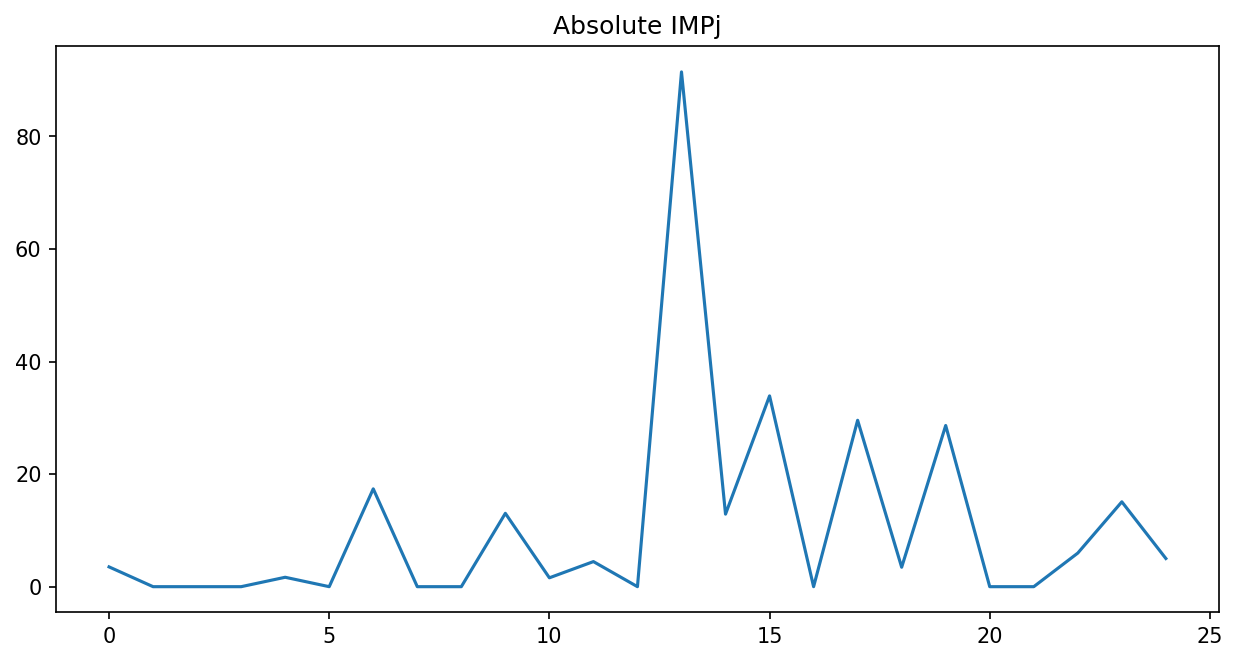

In [ ]:
plt.figure(figsize=[10,5],dpi=150)
plt.plot(np.abs(IMPj))
plt.title("Absolute IMPj")
plt.savefig("Absolute IMPj.png")
files.download("Absolute IMPj.png")

In [ ]:
np.argmax(IMPj)

13

### Input Neurons

In [ ]:
# Get input layer output 
#get_input_layer_output = K.function([mlp_try.layers[1].input],
 #                                 [mlp_try.layers[0].output])
#input_layer_output = get_input_layer_output(Xtrain)[0]

In [ ]:
#pd.DataFrame(input_layer_output)

In [ ]:
Xs = Xtrain.values
pd.DataFrame(Xs)

0           1           2   ...          15          16          17
0    106.690000  106.531999  101.487000  ...  106.790001  106.830002  106.769997
1     57.374000   57.486000   56.443000  ...   55.820000   55.070000   63.580002
2     70.745999   70.992999   72.697500  ...   69.779999   70.199997   70.570000
3    103.675998  104.227998  105.589999  ...  107.379997  104.629997  103.150002
4    102.950000  103.153001  104.148500  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
883   52.461999   54.231000   52.914500  ...   51.750000   51.240002   49.849998
884  113.517998  111.692998  112.688999  ...  115.000000  114.089996  114.379997
885   46.038000   44.921000   46.260000  ...   45.830002   46.279999   48.860001
886  118.612000  119.971000  119.250500  ...  118.199997  117.779999  117.580002
887   51.882000   50.898000   52.371500  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

In [ ]:
#Compute and display the mean activities X1 ... X18 of the 18 input neurons.
PROF_input=np.mean(Xs, axis=0)
pd.DataFrame(Xs)

0           1           2   ...          15          16          17
0    106.690000  106.531999  101.487000  ...  106.790001  106.830002  106.769997
1     57.374000   57.486000   56.443000  ...   55.820000   55.070000   63.580002
2     70.745999   70.992999   72.697500  ...   69.779999   70.199997   70.570000
3    103.675998  104.227998  105.589999  ...  107.379997  104.629997  103.150002
4    102.950000  103.153001  104.148500  ...  102.129997  103.410004  103.059998
..          ...         ...         ...  ...         ...         ...         ...
883   52.461999   54.231000   52.914500  ...   51.750000   51.240002   49.849998
884  113.517998  111.692998  112.688999  ...  115.000000  114.089996  114.379997
885   46.038000   44.921000   46.260000  ...   45.830002   46.279999   48.860001
886  118.612000  119.971000  119.250500  ...  118.199997  117.779999  117.580002
887   51.882000   50.898000   52.371500  ...   52.869999   53.070000   50.340000

[888 rows x 18 columns]

In [ ]:
pd.DataFrame(PROF_input).to_excel("Xs_mean_act.xlsx")
files.download("Xs_mean_act.xlsx")

In [ ]:
#Compute and display the mean activities X1 ... X18 of the 18 input neurons.
first_layer_weights = mlp_try.layers[0].get_weights()[0]
first_layer_weights
first_lay = first_layer_weights
first_lay

array([[ 3.50410193e-01,  2.98975706e-01,  1.41561389e-01,
        -2.68447906e-01,  6.46165684e-02, -3.49600941e-01,
         4.06246573e-01,  1.17198437e-01, -1.26230448e-01,
        -2.08413512e-01, -3.72800201e-01, -2.18392566e-01,
         1.59116406e-02,  7.21961781e-02,  2.42300928e-01,
         3.78903806e-01,  2.44903564e-01, -2.71235466e-01,
        -3.20895106e-01, -3.19376826e-01, -2.13412195e-01,
         9.87716988e-02,  2.40108803e-01,  2.06830889e-01,
         2.60927171e-01],
       [-1.28366351e-01, -3.14150155e-01, -1.34009123e-03,
        -3.63833934e-01,  7.74928257e-02, -1.79797038e-01,
         1.85504034e-01, -1.32922038e-01,  2.83615768e-01,
         1.73295483e-01,  3.31727654e-01, -5.01162931e-03,
        -2.93672621e-01,  2.20404476e-01,  2.94457078e-01,
         3.83839399e-01,  2.76821375e-01,  2.33373672e-01,
         1.79296449e-01,  9.58128348e-02,  4.27955389e-02,
         2.59554416e-01,  6.77971728e-03,  1.97587207e-01,
         2.93564379e-01],
    

In [ ]:
#Display all the weights U1 ... U18 linking the input nodes INP1 ... INP18 to the neuron NOD*
#Get weights for N1
N13_weights = first_lay[:,13]
N13_weights

array([ 0.07219618,  0.22040448,  0.04634837, -0.03048947,  0.32613358,
        0.01768745,  0.22167876,  0.39044154,  0.35455242,  0.13945417,
        0.29479256,  0.04703325,  0.1219533 ,  0.19437626,  0.3249735 ,
        0.0943709 ,  0.29000375, -0.01522521], dtype=float32)

In [ ]:
pd.DataFrame(N13_weights).to_excel("N13_weights.xlsx")
files.download("N13_weights.xlsx")

In [ ]:
PROF_input

array([94.32956761, 94.14141109, 93.74147865, 93.34324325, 93.46436945,
       93.56441442, 93.61238744, 93.71182435, 93.77603609, 93.88530415,
       93.96046177, 94.03608111, 94.10838972, 94.17902034, 94.23626129,
       94.35729739, 94.40665542, 94.46860362])

In [ ]:
Fs = N13_weights*PROF_input

In [ ]:
pd.DataFrame(Fs)

0
0    6.810234
1   20.749188
2    4.344765
3   -2.845986
4   30.481869
5    1.654915
6   20.751878
7   36.588989
8   33.248520
9   13.092697
10  27.698845
11   4.422823
12  11.476829
13  18.306166
14  30.624287
15   8.904583
16  27.378284
17  -1.438305

In [ ]:
Fs_abs = np.abs(Fs)
#Fs_avg = pd.DataFrame(Fs_abs.mean(axis=0))

In [ ]:
pd.DataFrame(Fs_abs).to_excel("Fs_absolute.xlsx")
files.download("Fs_absolute.xlsx")

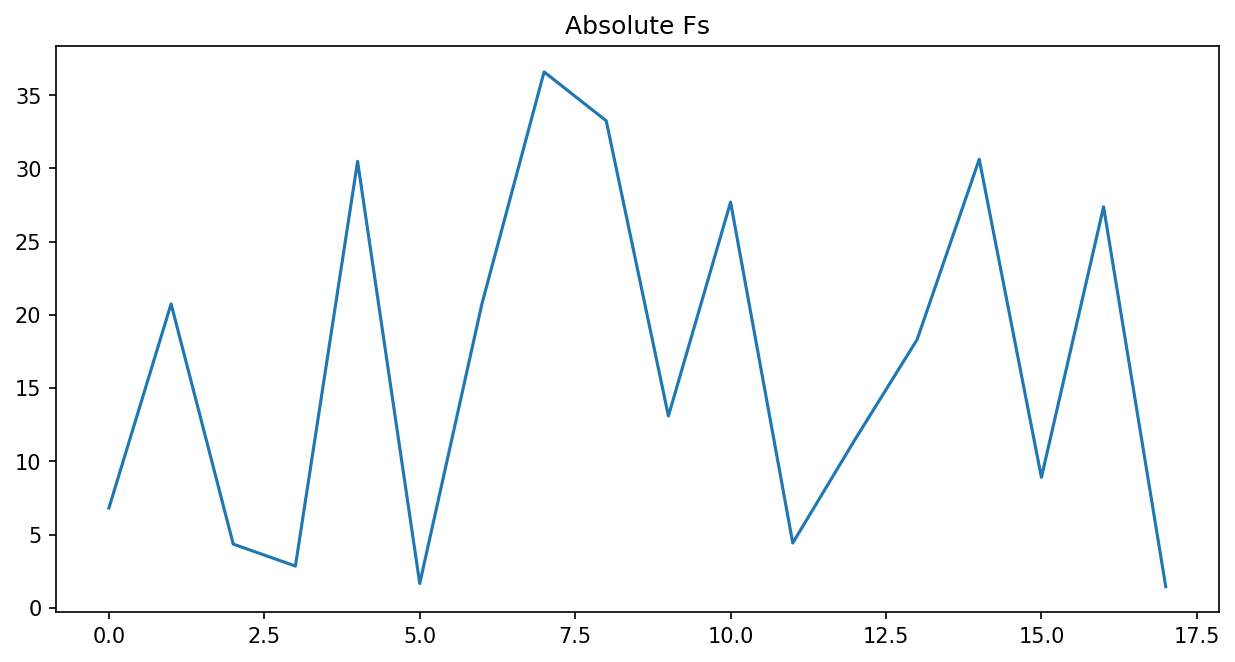

In [ ]:
plt.figure(figsize=[10,5],dpi=150)
plt.plot(Fs_abs)
plt.title("Absolute Fs")
plt.savefig("Absolute Fs.png")
files.download("Absolute Fs.png")

In [ ]:
top5 = np.argsort(Fs_abs)[::-1][:5]

In [ ]:
top5

array([ 7,  8, 14,  4, 10])

In [ ]:
Xtrain.columns[top5]

Index(['S(t-10)', 'S(t-9)', 'S(t-3)', 'S(t-13)', 'S(t-7)'], dtype='object')

In [ ]:
Xtrain[[ 'S(t-13)','S(t-10)', 'S(t-9)', 'S(t-7)','S(t-3)']].head()

S(t-13)     S(t-10)      S(t-9)      S(t-7)      S(t-3)
731   93.910004  105.599998  106.849998  106.180000  107.309998
291   56.259998   55.910000   57.180000   58.700001   56.689999
46    73.080002   73.720001   72.360001   69.750000   69.250000
795  107.989998  107.019997  104.279999  105.709999  100.379997
772  107.610001  105.820000  106.410004  101.459999  102.970001